Basic analyses of behavior in the FHT task. 

In [ ]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import entropy
import math

# 1. Load and prep behavioral data

In [229]:
behav_path = os.getcwd() + '/ProcessedData/AllData.csv' # this expects ProcessedData to be in the analysis repo
behav_data = pd.read_csv(behav_path)
subjects = behav_data['Subj'].unique()

## Get metadata.
n_trials = max(behav_data['Trial'])
n_games = max(behav_data['Game'])
game_length = len(behav_data.loc[(behav_data['Subj'] == 23) & (behav_data['Game'] == 1)])

# change subj to int
behav_data['Subj'] = behav_data['Subj'].astype(int)

## Add trial-within-game variable.
behav_data['WithinGameTrial'] = behav_data['Trial'] - (behav_data['Game']-1)*game_length
behav_data = behav_data.fillna(0)

In [230]:
behav_data.isnull().sum()

Subj               0
Trial              0
Game               0
Stim11             0
Stim12             0
Stim13             0
Stim21             0
Stim22             0
Stim23             0
Stim31             0
Stim32             0
Stim33             0
Choice             0
Chosen1            0
Chosen2            0
Chosen3            0
Unchosen1          0
Unchosen2          0
Unchosen3          0
Unchosen4          0
Unchosen5          0
Unchosen6          0
Outcome            0
Dim                0
Feat               0
CenterDim          0
CenterFeat         0
Correct            0
LearnedFeat        0
PoL                0
RT                 0
WithinGameTrial    0
dtype: int64

In [120]:
subj_id = 39
block = 10
trial = 7
sub = behav_data.loc[behav_data['Subj'] == subj_id]
sub = sub.loc[sub['Trial'] == (block-1)*40 + trial]
sub[['Chosen1', 'Chosen2', 'Chosen3', 'Feat']]

,Chosen1,Chosen2,Chosen3,Feat
5566,3.0,5.0,8.0,5


# 2. Plot general learning and accuracy

## 2a. Plot general learning curve

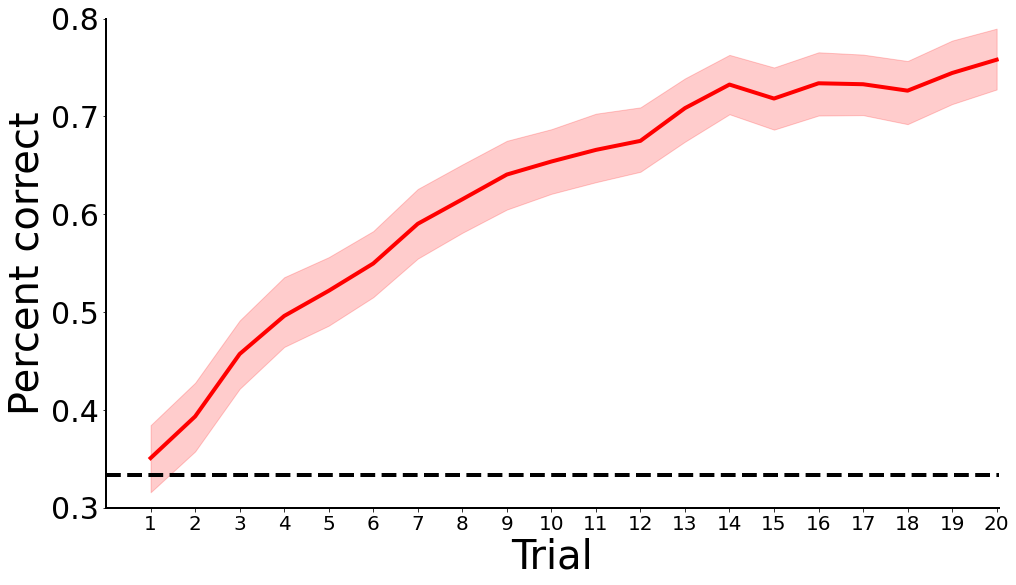

In [121]:
df = pd.melt(behav_data, col_level=0, id_vars='WithinGameTrial', value_vars=['Correct'])

fig, ax = plt.subplots(figsize=(16,9))
ax.axhline(y=1/3, color='k', lw=4, linestyle='--');
sns.lineplot(x = 'WithinGameTrial', y="value", err_style="band", ci=95, data=df, lw=4, legend=False, color='red')
sns.despine()
ax.set_xlim([0,game_length+.05])
ax.set_ylim([0.3,0.8])
ax.set_xticks(np.arange(game_length)+1)
xl = ax.set_xlabel('Trial',fontsize = 40);
yl = ax.set_ylabel('Percent correct',fontsize = 40);
for axis in ['top','bottom','left','right']:
      ax.spines[axis].set_linewidth(2)
ax.tick_params(axis='x',colors='k')
plt.xticks(fontsize=20);
plt.yticks(fontsize=30);

## 2b. Plot general number correct in last 6

In [231]:
def getLastSixGames(behav_data, game_length):
    last_6 = np.arange(game_length-6,game_length)+1

    # only grab last six trials of each game
    df_last_6 = behav_data.loc[behav_data['WithinGameTrial'].isin(last_6)].reset_index(drop=True)
    df_last_6 = df_last_6[['Subj','Game','WithinGameTrial','Correct']]

    ## Sum corrects in last 6 within game.
    df_last_6 = df_last_6.groupby(['Subj','Game'])['Correct'].sum().reset_index()

    ## Count and normalize by number of games.
    df_last_6 = df_last_6.groupby(['Subj','Correct']).count().unstack(fill_value=0).stack().reset_index()
    df_last_6['Game'] = df_last_6['Game'] / n_games
    
    return df_last_6

In [232]:
def getAverageLastSixTrials(behav_data, game_length):
    last_6 = np.arange(game_length-6,game_length)+1

    # only grab last six trials of each game
    df_last_6 = behav_data.loc[behav_data['WithinGameTrial'].isin(last_6)].reset_index(drop=True)
    df_last_6 = df_last_6[['Subj','Game','WithinGameTrial','Correct']]

    ## Sum corrects in last 6 within game.
    df_last_6 = df_last_6.groupby(['Subj','Game'])['Correct'].sum().reset_index()
    
    ## Get average number of games correct in last six.
    df_last_6['AverageNumberCorrect'] = df_last_6['Correct']
    df_last_6 = df_last_6.groupby(['Subj'])['AverageNumberCorrect'].sum().reset_index()
    df_last_6['AverageNumberCorrect'] = df_last_6['AverageNumberCorrect']/20

    
    return df_last_6


In [233]:
last_6 = np.arange(game_length-6,game_length)+1

# only grab last six trials of each game
df_last_6 = behav_data.loc[behav_data['WithinGameTrial'].isin(last_6)].reset_index(drop=True)
df_last_6 = df_last_6[['Subj','Game','WithinGameTrial','Correct']]

## Sum corrects in last 6 within game.
df_last_6 = df_last_6.groupby(['Subj','Game'])['Correct'].sum().reset_index()

## Count and normalize by number of games.
df_last_6['AverageNumberCorrect'] = df_last_6['Correct']
df_last_6 = df_last_6.groupby(['Subj'])['AverageNumberCorrect'].sum().reset_index()
df_last_6['AverageNumberCorrect'] = df_last_6['AverageNumberCorrect']/20

In [125]:
df_last_6

,Subj,AverageNumberCorrect
0,23,4.90
1,26,5.10
2,27,4.40
3,28,5.05
4,29,3.65
5,30,3.65
6,31,4.80
7,33,5.05
8,34,3.50
9,35,4.60


In [126]:
df_last_6_games = getLastSixGames(behav_data, game_length)

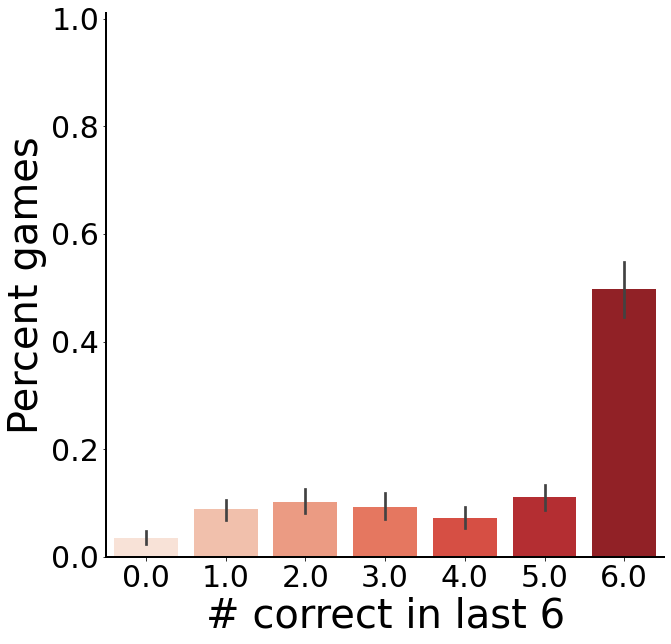

In [127]:
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x="Correct", y="Game", data=df_last_6_games, palette="Reds",ci=95);
sns.despine()
ax.set_ylim([0,1.01])
xl = ax.set_xlabel('# correct in last 6',fontsize = 40);
yl = ax.set_ylabel('Percent games',fontsize = 40);
for axis in ['top','bottom','left','right']:
      ax.spines[axis].set_linewidth(2)
ax.tick_params(labelsize=30)

In [234]:
average_last_six = getAverageLastSixTrials(behav_data, game_length)
average_last_six

,Subj,AverageNumberCorrect
0,23,4.90
1,26,5.10
2,27,4.40
3,28,5.05
4,29,3.65
5,30,3.65
6,31,4.80
7,33,5.05
8,34,3.50
9,35,4.60


In [238]:
# if the percentage of games that the subject had 5 or 6 correct in the last 6 trials is above 65%, then the game is learned
learned = average_last_six.loc[average_last_six['AverageNumberCorrect'] >= 4.8].reset_index(drop=True)
learned_sub_ids = learned.Subj.to_numpy()
notlearned = average_last_six.loc[average_last_six['AverageNumberCorrect'] < 4.8].reset_index(drop=True)
notlearned_sub_ids = notlearned.Subj.to_numpy()
learned_df = behav_data.copy()
notlearned_df = behav_data.copy()

# store learned information in new dataframe and in big dataframe
for subj in learned_sub_ids:
    notlearned_df = notlearned_df[notlearned_df.Subj != subj]
    behav_data.loc[behav_data['Subj'] == subj,'LearnedFeat'] = True
for subj in notlearned_sub_ids:
    learned_df = learned_df[learned_df.Subj != subj]
    behav_data.loc[behav_data['Subj'] == subj,'LearnedFeat'] = False

In [236]:
learned_sub_ids

array([23, 26, 28, 31, 33, 36, 38, 43, 45, 47, 55, 57, 63, 66])

In [237]:
notlearned_sub_ids

array([27, 29, 30, 34, 35, 37, 39, 40, 41, 42, 44, 46, 49, 53, 54, 58, 60,
       61, 62, 67, 68, 69, 70, 71])

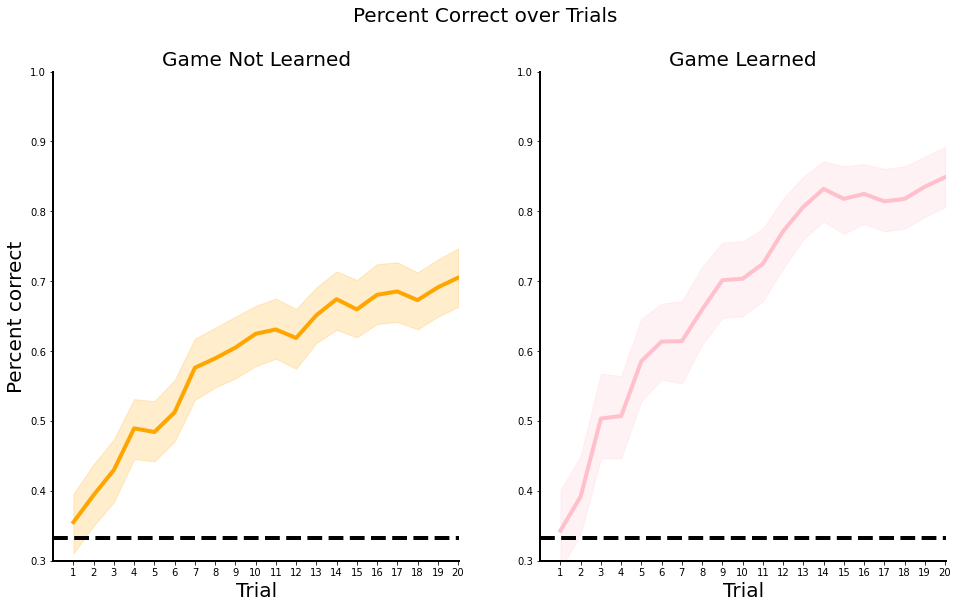

In [132]:
df_learned = pd.melt(learned_df, col_level=0, id_vars='WithinGameTrial', value_vars=['Correct'])
df_notlearned = pd.melt(notlearned_df, col_level=0, id_vars='WithinGameTrial', value_vars=['Correct'])

fig, (ax1, ax2) = plt.subplots(1 ,2, figsize=(16,9))
fig.suptitle('Percent Correct over Trials',fontsize = 20)
ax1.set_title('Game Not Learned',fontsize = 20)
ax2.set_title('Game Learned',fontsize = 20)
ax1.axhline(y=1/3, color='k', lw=4, linestyle='--');
ax2.axhline(y=1/3, color='k', lw=4, linestyle='--');

l1 = sns.lineplot(ax = ax1, x = 'WithinGameTrial', y="value", err_style="band", ci=95, data=df_notlearned, lw=4, legend=False, color='orange')
l2 = sns.lineplot(ax = ax2, x = 'WithinGameTrial', y="value", err_style="band", ci=95, data=df_learned, lw=4, legend=False, color='pink')
l2.set(ylabel=None)
sns.despine()
ax1.set_xlim([0,game_length+.05])
ax1.set_ylim([0.3,1])
ax1.set_xticks(np.arange(game_length)+1)
ax2.set_xlim([0,game_length+.05])
ax2.set_ylim([0.3, 1])
ax2.set_xticks(np.arange(game_length)+1)
xl = ax1.set_xlabel('Trial',fontsize = 20);
yl = ax1.set_ylabel('Percent correct',fontsize = 20);
xl = ax2.set_xlabel('Trial',fontsize = 20);
for axis in ['top','bottom','left','right']:
      ax1.spines[axis].set_linewidth(2)
      ax2.spines[axis].set_linewidth(2)
ax1.tick_params(axis='x',colors='k')
ax2.tick_params(axis='x',colors='k')
# plt.xticks(fontsize=20);
# plt.yticks(fontsize=20);

# 3. Plot learning curves by age

In [239]:
# import agemap
raw_data_dir = os.getcwd().strip('ldm-analysis') + 'RawData/'
age_df = pd.read_csv(raw_data_dir + 'SubDemographics.csv').dropna()
age_df['Subj_id'] = age_df['Subj_id'].astype(int)
ageMap = age_df[['Age','Subj_id']] # .set_index('Subj_id')
ageMap

,Age,Subj_id
0,15.12,23
1,15.39,24
2,19.79,25
3,23.32,26
4,14.58,27
5,14.00,28
6,16.73,29
7,17.48,30
8,17.64,31
9,30.36,32


In [134]:
ageMap.to_csv("ProcessedData/ageMap.csv", index=False)

In [240]:
# add age related columns in behavioral dataframe
behav_data["Adult"] = False
behav_data['Age'] = np.nan
for index, row in behav_data.iterrows():
    subj_id = int(row.Subj)
    age = ageMap.loc[ageMap['Subj_id'] == subj_id].Age.item()
    if age < 10:
        behav_data.drop([index]) # remove 67 and 56 because no age info
    else:
        behav_data.loc[index, "Age"] = age
        if age >= 18:
            behav_data.loc[index, "Adult"] = True
behav_data = behav_data[behav_data['Age'].notna()]

In [241]:
behav_data.isnull().sum()

Subj               0
Trial              0
Game               0
Stim11             0
Stim12             0
Stim13             0
Stim21             0
Stim22             0
Stim23             0
Stim31             0
Stim32             0
Stim33             0
Choice             0
Chosen1            0
Chosen2            0
Chosen3            0
Unchosen1          0
Unchosen2          0
Unchosen3          0
Unchosen4          0
Unchosen5          0
Unchosen6          0
Outcome            0
Dim                0
Feat               0
CenterDim          0
CenterFeat         0
Correct            0
LearnedFeat        0
PoL                0
RT                 0
WithinGameTrial    0
Adult              0
Age                0
dtype: int64

In [137]:
# split the dataframe into adult and adolescent dataframes
adult_behav_data = behav_data.loc[behav_data['Adult']]
adole_behav_data = behav_data.loc[behav_data['Adult'] == False]

## 3a. Plot age-related learning curves

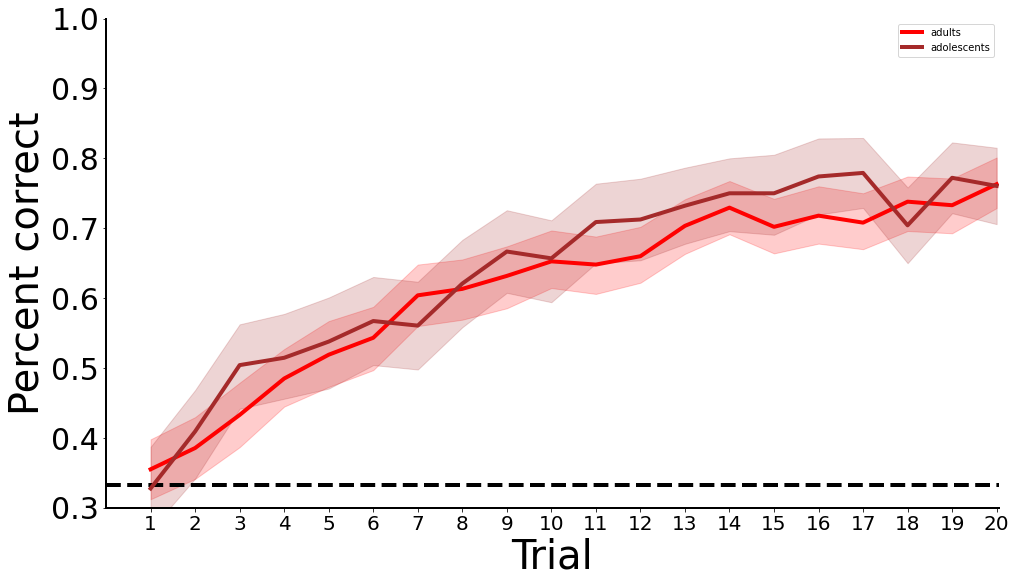

In [138]:
df_adult = pd.melt(adult_behav_data, col_level=0, id_vars='WithinGameTrial', value_vars=['Correct'])
df_adole = pd.melt(adole_behav_data, col_level=0, id_vars='WithinGameTrial', value_vars=['Correct'])

fig, ax = plt.subplots(figsize=(16,9))
ax.axhline(y=1/3, color='k', lw=4, linestyle='--');
sns.lineplot(x = 'WithinGameTrial', y="value", err_style="band", ci=95, data=df_adult, lw=4, legend='brief', label='adults', color='red')
sns.lineplot(x = 'WithinGameTrial', y="value", err_style="band", ci=95, data=df_adole, lw=4, legend='brief', label='adolescents',  color='brown')
sns.despine()
ax.set_xlim([0,game_length+.05])
ax.set_ylim([0.3,1])
ax.set_xticks(np.arange(game_length)+1)
xl = ax.set_xlabel('Trial',fontsize = 40);
yl = ax.set_ylabel('Percent correct',fontsize = 40);
for axis in ['top','bottom','left','right']:
      ax.spines[axis].set_linewidth(2)
ax.tick_params(axis='x',colors='k')
plt.xticks(fontsize=20);
plt.yticks(fontsize=30);

## 3b. Plot age-related number correct in last six

In [139]:
# grab last six games
adult_df_last_6 = getLastSixGames(adult_behav_data, game_length)
adole_df_last_6 = getLastSixGames(adole_behav_data, game_length)

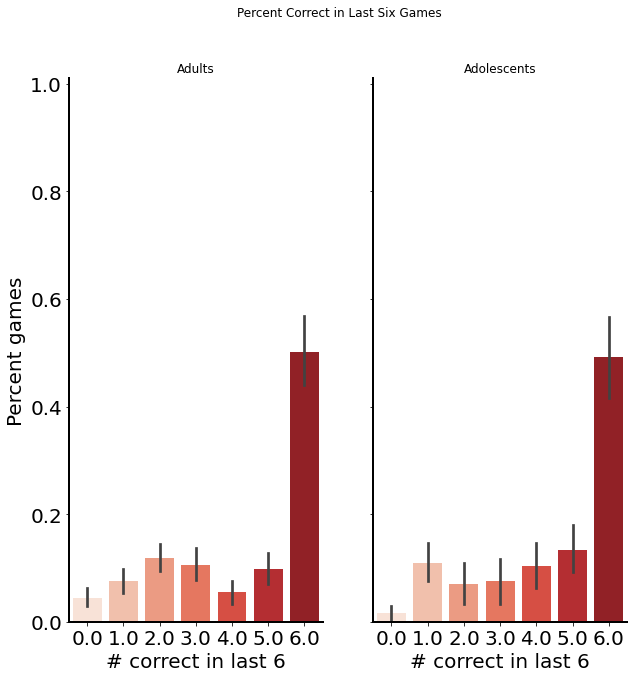

In [140]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,10))
fig.suptitle('Percent Correct in Last Six Games')
b1 = sns.barplot(ax = ax1, x="Correct", y="Game", data=adult_df_last_6, palette="Reds",ci=95);
ax1.set_title('Adults')
b2 = sns.barplot(ax = ax2, x="Correct", y="Game", data=adole_df_last_6, palette="Reds",ci=95);
b2.set(ylabel=None)
ax2.set_title('Adolescents')
sns.despine()
ax1.set_ylim([0,1.01])
ax1.set_xlabel('# correct in last 6',fontsize = 20);
ax1.set_ylabel('Percent games',fontsize = 20);
ax2.set_xlabel('# correct in last 6',fontsize = 20);
for axis in ['top','bottom','left','right']:
      ax1.spines[axis].set_linewidth(2)
      ax2.spines[axis].set_linewidth(2)
ax1.tick_params(labelsize=20)
ax2.tick_params(labelsize=20)

In [141]:
# separate adults and adolescents in learned vs not learned
learned_adole_df = adole_behav_data.loc[adole_behav_data['LearnedFeat']]
notlearned_adole_df = adole_behav_data.loc[adole_behav_data['LearnedFeat'] == False]

learned_adult_df = adult_behav_data.loc[adult_behav_data['LearnedFeat']]
notlearned_adult_df = adult_behav_data.loc[adult_behav_data['LearnedFeat'] == False]

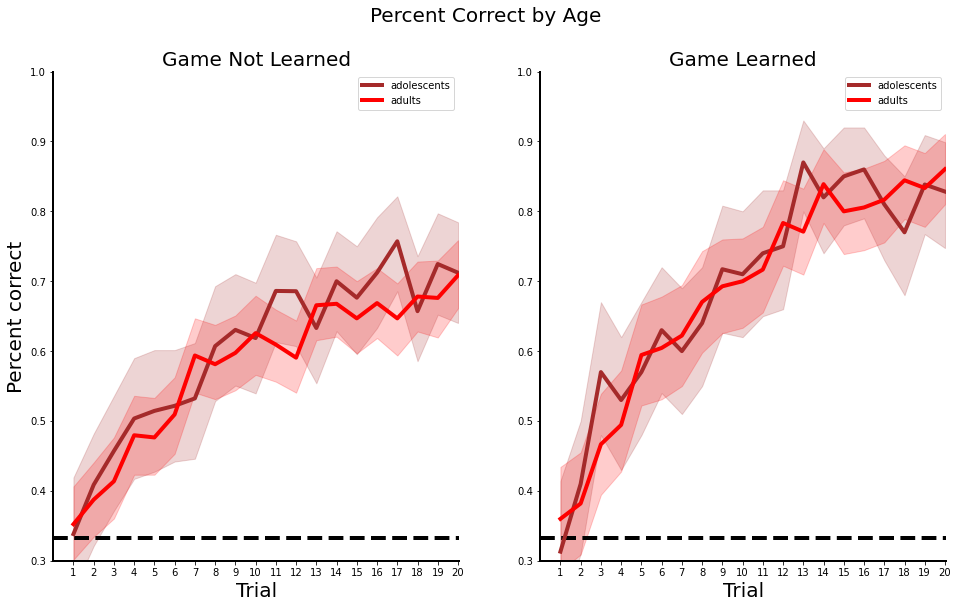

In [142]:
df_adole_learned = pd.melt(learned_adole_df, col_level=0, id_vars='WithinGameTrial', value_vars=['Correct'])
df_adole_notlearned = pd.melt(notlearned_adole_df, col_level=0, id_vars='WithinGameTrial', value_vars=['Correct'])
df_adult_learned = pd.melt(learned_adult_df, col_level=0, id_vars='WithinGameTrial', value_vars=['Correct'])
df_adult_notlearned = pd.melt(notlearned_adult_df, col_level=0, id_vars='WithinGameTrial', value_vars=['Correct'])

fig, (ax1, ax2) = plt.subplots(1 ,2, figsize=(16,9))
fig.suptitle('Percent Correct by Age',fontsize = 20)
ax1.set_title('Game Not Learned',fontsize = 20)
ax2.set_title('Game Learned',fontsize = 20)
ax1.axhline(y=1/3, color='k', lw=4, linestyle='--');
ax2.axhline(y=1/3, color='k', lw=4, linestyle='--');

l1 = sns.lineplot(ax = ax1, x = 'WithinGameTrial', y="value", err_style="band", ci=95, data=df_adole_notlearned, lw=4, legend='brief', label='adolescents', color='brown')
l2 = sns.lineplot(ax = ax2, x = 'WithinGameTrial', y="value", err_style="band", ci=95, data=df_adole_learned, lw=4, legend='brief', label='adolescents', color='brown')
l3 = sns.lineplot(ax = ax1, x = 'WithinGameTrial', y="value", err_style="band", ci=95, data=df_adult_notlearned, lw=4, legend='brief', label='adults',  color='red')
l4 = sns.lineplot(ax = ax2, x = 'WithinGameTrial', y="value", err_style="band", ci=95, data=df_adult_learned, lw=4, legend='brief', label='adults', color='red')
l2.set(ylabel=None)
sns.despine()
ax1.set_xlim([0,game_length+.05])
ax1.set_ylim([0.3,1])
ax1.set_xticks(np.arange(game_length)+1)
ax2.set_xlim([0,game_length+.05])
ax2.set_ylim([0.3, 1])
ax2.set_xticks(np.arange(game_length)+1)
xl = ax1.set_xlabel('Trial',fontsize = 20);
yl = ax1.set_ylabel('Percent correct',fontsize = 20);
xl = ax2.set_xlabel('Trial',fontsize = 20);
for axis in ['top','bottom','left','right']:
      ax1.spines[axis].set_linewidth(2)
      ax2.spines[axis].set_linewidth(2)
ax1.tick_params(axis='x',colors='k')
ax2.tick_params(axis='x',colors='k')

# Relative Looking Time Analyses

In [143]:
## Define global variables ##
et_data_dir = os.getcwd() + '/ProcessedData/'# this expects ProcessedData to be in the analysis repo
image_dir = os.getcwd().strip('ldm-analysis') + 'FinalStimuli/ByNumber/'
raw_data_dir = os.getcwd().strip('ldm-analysis') + 'RawData/' # this expects RawData to be one directory up from the analysis repo

## Define screen metadata.
xdim, ydim, n_screens = 1280, 1024, 1 
aoisidelength = 162
n_aois = 9

# Define list with all subject ids; remove 33, 66, and 58 for ec and preproc troubles and 56 and 67 for age issues
good_subjects =  [23, 26, 27, 28, 29, 30, 31, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 53, 54, 
                 55, 57, 60, 61, 62, 63, 68, 69, 70, 71];

In [144]:
looking_time_df = {}
for subj_id in good_subjects:
    fixations = pd.read_csv(et_data_dir + str(subj_id) + 'fixations.csv')
    print(fixations)
    duration_summary = fixations.groupby(['Trial', 'Block','Feature'])['Duration'].sum()
    looking_time_df['Sub' + str(subj_id)] = duration_summary
looking_time_df = pd.DataFrame(looking_time_df).fillna(0).reset_index()

      Unnamed: 0  Trial   AoI  Onset  Offset  Duration  Feature  Block
0              0    1.0  10.0  0.056   0.068     0.012     10.0      1
1              1    1.0   6.0  0.072   0.088     0.016      2.0      1
2              2    1.0   5.0  0.092   0.120     0.028      7.0      1
3              3    1.0   4.0  0.124   0.328     0.204      5.0      1
4              4    1.0   5.0  0.332   0.336     0.004      7.0      1
...          ...    ...   ...    ...     ...       ...      ...    ...
6916         629  400.0   5.0  2.564   2.616     0.052      9.0     10
6917         630  400.0  10.0  2.620   2.628     0.008     10.0     10
6918         631  400.0   5.0  2.632   2.732     0.100      9.0     10
6919         632  400.0  10.0  2.736   3.628     0.892     10.0     10
6920         633  400.0   4.0  3.632   4.008     0.376      6.0     10

[6921 rows x 8 columns]
      Unnamed: 0  Trial   AoI  Onset  Offset  Duration  Feature  Block
0              0    1.0   5.0  0.000   0.208     0.2

In [145]:
looking_time_df = pd.wide_to_long(looking_time_df, 'Sub', i=['Trial', 'Block', 'Feature'], j="Subj").rename(columns={"Sub": "Duration"}).unstack(level='Feature').reset_index()
looking_time_df = looking_time_df.fillna(0)
looking_time_df.to_csv(et_data_dir + 'OrganizedLookingTimes.csv', index=False)

In [146]:
# using to look at chosen features on trials
sub = behav_data.loc[behav_data['Subj'] == 39,['Trial','Chosen1','Chosen2','Chosen3','Feat']]
sub.loc[sub['Trial'] == (9*40)+1]

,Trial,Chosen1,Chosen2,Chosen3,Feat
5560,361,2.0,5.0,9.0,5


In [147]:
for index, row in looking_time_df.iterrows():
    total_looking_time = row.Duration.sum()
    looking_time_df.loc[index, 'TotalLookingTime'] = total_looking_time
looking_time_df.columns = looking_time_df.columns.to_flat_index()
looking_time_df = looking_time_df.rename(columns={('Duration',  1.0): 'Feature1',('Duration',  2.0): 'Feature2', ('Duration',  3.0): 'Feature3',
                        ('Duration',  4.0): 'Feature4',('Duration',  5.0): 'Feature5', ('Duration',  6.0): 'Feature6',
                        ('Duration',  7.0): 'Feature7',('Duration',  8.0): 'Feature8', ('Duration',  9.0): 'Feature9',
                        ('Duration',  10.0): 'Feature10', ('Trial', ''):'Trial', ('Block', ''):'Block',
                        ('Subj', ''):'Subj', ('TotalLookingTime', ''):'TotalLookingTime'})

In [148]:
looking_time_df = looking_time_df.fillna(0)

In [149]:
looking_time_df.isnull().sum()

Trial               0
Block               0
Subj                0
Feature1            0
Feature2            0
Feature3            0
Feature4            0
Feature5            0
Feature6            0
Feature7            0
Feature8            0
Feature9            0
Feature10           0
TotalLookingTime    0
dtype: int64

In [150]:
looking_time_df.to_csv(et_data_dir + 'LookingTimes.csv', index=False)

In [151]:
relative_looking_time_df = looking_time_df.copy()
# relative_looking_time_df.columns = looking_time_df.columns.to_flat_index()
# relative_looking_time_df = relative_looking_time_df.rename(columns={('Duration',  1.0): 'Feature1',('Duration',  2.0): 'Feature2', ('Duration',  3.0): 'Feature3',
#                         ('Duration',  4.0): 'Feature4',('Duration',  5.0): 'Feature5', ('Duration',  6.0): 'Feature6',
#                         ('Duration',  7.0): 'Feature7',('Duration',  8.0): 'Feature8', ('Duration',  9.0): 'Feature9',
#                         ('Duration',  10.0): 'Feature10', ('Trial', ''):'Trial', ('Block', ''):'Block',
#                         ('Subj', ''):'Subj', ('TotalLookingTime', ''):'TotalLookingTime'})

In [152]:
for featnum in np.arange(10)+1:
    relative_looking_time_df['Feature'+ str(featnum)] = relative_looking_time_df['Feature'+ str(featnum)]/relative_looking_time_df['TotalLookingTime']

In [154]:
relative_looking_time_df = relative_looking_time_df.fillna(0)
relative_looking_time_df.isnull().sum()

Trial               0
Block               0
Subj                0
Feature1            0
Feature2            0
Feature3            0
Feature4            0
Feature5            0
Feature6            0
Feature7            0
Feature8            0
Feature9            0
Feature10           0
TotalLookingTime    0
dtype: int64

In [42]:
lt_example = looking_time_df.loc[looking_time_df['Subj'] == 39]
lt_example = lt_example.loc[lt_example['Block'] == 10]
lt_example = lt_example.loc[lt_example['Trial'] == (9*40)+1]
lt_example

,Trial,Block,Subj,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,TotalLookingTime
12612,361.0,10,39,0.0,0.305361,0.065268,0.0,0.002331,0.0,0.0,0.008159,0.455711,0.16317,3.432


In [43]:
lt_example = pd.wide_to_long(lt_example, 'Feature', i=['Trial', 'Block', 'Subj'], j="FeatureNumber")

In [44]:
lt_example.columns = lt_example.columns.to_flat_index()
lt_example = lt_example.reset_index().rename(columns={'Feature':'LookingTime'})

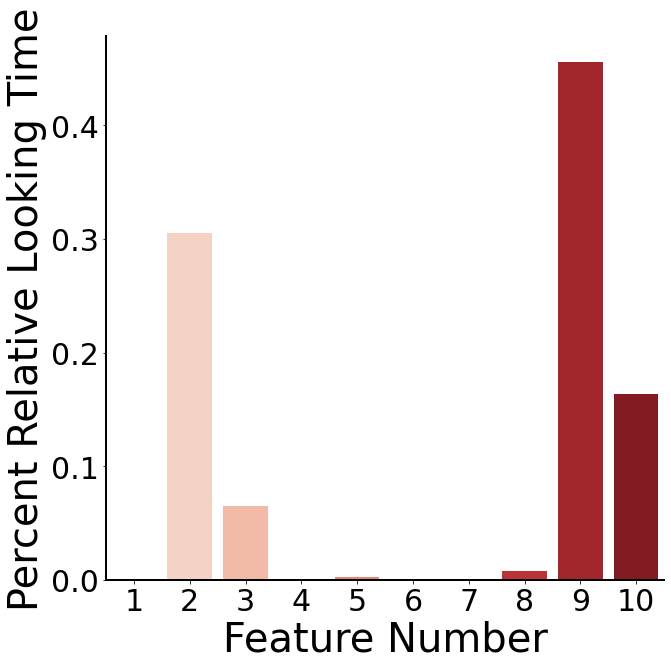

In [45]:
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x="FeatureNumber", y="LookingTime", data=lt_example, palette="Reds",ci=95);
sns.despine()
# ax.set_ylim([0,1.01])
xl = ax.set_xlabel('Feature Number',fontsize = 40);
yl = ax.set_ylabel('Percent Relative Looking Time',fontsize = 40);
for axis in ['top','bottom','left','right']:
      ax.spines[axis].set_linewidth(2)
ax.tick_params(labelsize=30)

# Calculate Entropy

In [46]:
len(adult_behav_data)

10000

In [9]:
def calculateEntropy(featureList, base):
    entropy_list = []
    for probFeat in featureList:
        if probFeat != 0:
            entropy_list.append(probFeat*math.log(probFeat, base))
        else:
            entropy_list.append(0)
    return -np.nansum(entropy_list)

## Entropy across Features

In [164]:
entropy_col = []
for index, row in relative_looking_time_df.iterrows():
    if row.TotalLookingTime != 0:
        curr_entropy = calculateEntropy([row.Feature1, row.Feature2, row.Feature3, row.Feature4, row.Feature5, row.Feature6, row.Feature7, row.Feature8, row.Feature9], base=9)
        entropy_col.append(curr_entropy)
    else:
        entropy_col.append(0)
relative_looking_time_df['FeatureEntropy'] = entropy_col

## Entropy Across Dimensions

In [165]:
# sum relative looking time over dimensions
relative_looking_time_df['Animals'] = relative_looking_time_df['Feature1'] + relative_looking_time_df['Feature2'] + relative_looking_time_df['Feature3']
relative_looking_time_df['Landscapes'] = relative_looking_time_df['Feature4'] + relative_looking_time_df['Feature5'] + relative_looking_time_df['Feature6']
relative_looking_time_df['Objects'] = relative_looking_time_df['Feature7'] + relative_looking_time_df['Feature8'] + relative_looking_time_df['Feature9']

entropy_col = []
for index, row in relative_looking_time_df.iterrows():
    if row.TotalLookingTime != 0:
        curr_entropy = calculateEntropy([row.Animals, row.Landscapes, row.Objects], base=3)
        entropy_col.append(curr_entropy)
    else:
        entropy_col.append(0)
relative_looking_time_df['DimensionEntropy'] = entropy_col

In [111]:
looking_time_df.isnull().sum()

Trial                 0
Block                 0
Subj                  0
Feature1              0
Feature2              0
Feature3              0
Feature4              0
Feature5              0
Feature6              0
Feature7              0
Feature8              0
Feature9              0
Feature10             0
TotalLookingTime      0
FeatureEntropy      209
Animals               0
Landscapes            0
Objects               0
DimensionEntropy    209
dtype: int64

In [167]:
relative_looking_time_df.isnull().sum()

Trial               0
Block               0
Subj                0
Feature1            0
Feature2            0
Feature3            0
Feature4            0
Feature5            0
Feature6            0
Feature7            0
Feature8            0
Feature9            0
Feature10           0
TotalLookingTime    0
FeatureEntropy      0
Animals             0
Landscapes          0
Objects             0
DimensionEntropy    0
dtype: int64

In [168]:
relative_looking_time_df.to_csv(et_data_dir + 'RelativeLookingTimes.csv', index=False)

# Make one big DF

In [242]:
good_behav_data = behav_data[behav_data['Subj'] != 33]
good_behav_data = good_behav_data[good_behav_data['Subj'] != 66]
good_behav_data = good_behav_data[good_behav_data['Subj'] != 58]
good_behav_data = good_behav_data.reset_index(drop=True)

In [243]:
good_behav_data.to_csv("ProcessedData/CleanBehavData.csv", index=False)

In [244]:
good_behav_data = behav_data[behav_data['Subj'] != 33]
good_behav_data = good_behav_data[good_behav_data['Subj'] != 66]
good_behav_data = good_behav_data[good_behav_data['Subj'] != 58]
good_behav_data = good_behav_data.reset_index(drop=True)
new_df = pd.merge(good_behav_data, relative_looking_time_df,  how='left', on=['Subj','Trial'])

In [245]:
# read out combined dataframe for easy access
new_df.to_csv("ProcessedData/CombinedBehavioralEyeTrackingData.csv", index=False)

In [53]:
new_df

,Subj,Trial,Game,Stim11,Stim12,Stim13,Stim21,Stim22,Stim23,Stim31,...,Feature6,Feature7,Feature8,Feature9,Feature10,FeatureEntropy,Animals,Landscapes,Objects,DimensionEntropy
0,23,1,1,1,6,8,2,5,7,3,...,0.000000,0.447034,0.007415,0.000000,0.096398,0.553768,0.298729,0.150424,0.454449,0.919397
1,23,2,1,2,5,7,1,4,8,3,...,0.000000,0.138427,0.197121,0.000000,0.019934,0.662668,0.212625,0.431894,0.335548,0.964491
2,23,3,1,3,4,7,2,5,9,1,...,0.000000,0.405690,0.000000,0.242360,0.011591,0.647912,0.144362,0.195996,0.648051,0.799723
3,23,4,1,1,4,7,2,5,8,3,...,0.000000,0.000000,0.487912,0.000000,0.025275,0.444538,0.362637,0.124176,0.487912,0.889076
4,23,5,1,1,6,8,2,4,7,3,...,0.000000,0.439220,0.000000,0.042431,0.017202,0.557065,0.243119,0.258028,0.481651,0.952268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,71,396,20,1,5,7,3,4,9,2,...,0.158747,0.109071,0.000000,0.490281,0.021598,0.592264,0.208423,0.170626,0.599352,0.850333
13996,71,397,20,1,5,8,2,4,9,3,...,0.000000,0.000000,0.000000,0.593079,0.056086,0.411844,0.130072,0.220764,0.593079,0.823688
13997,71,398,20,1,6,7,2,4,9,3,...,0.000000,0.000000,0.124040,0.403952,0.027442,0.602333,0.416026,0.028540,0.527991,0.726755
13998,71,399,20,1,6,7,3,5,8,2,...,0.036677,0.354908,0.266451,0.001079,0.019417,0.690990,0.166127,0.192017,0.622438,0.827024


In [260]:
adole_combined_df = new_df[new_df['Adult'] == False]
adult_combined_df = new_df[new_df['Adult']]

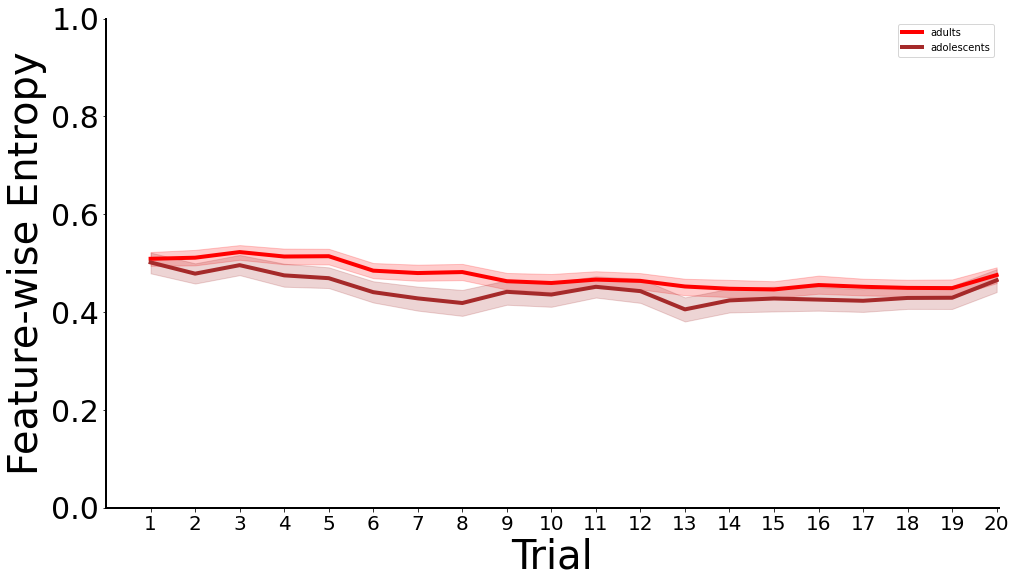

In [55]:
combined_df_adult = pd.melt(adult_combined_df, col_level=0, id_vars='WithinGameTrial', value_vars=['FeatureEntropy'])
combined_df_adole = pd.melt(adole_combined_df, col_level=0, id_vars='WithinGameTrial', value_vars=['FeatureEntropy'])

fig, ax = plt.subplots(figsize=(16,9))
sns.lineplot(x = 'WithinGameTrial', y="value", err_style="band", ci=95, data=combined_df_adult, lw=4, legend='brief', label='adults', color='red')
sns.lineplot(x = 'WithinGameTrial', y="value", err_style="band", ci=95, data=combined_df_adole, lw=4, legend='brief', label='adolescents',  color='brown')
sns.despine()
ax.set_xlim([0,game_length+.05])
ax.set_ylim([0,1])
ax.set_xticks(np.arange(game_length)+1)
xl = ax.set_xlabel('Trial',fontsize = 40);
yl = ax.set_ylabel('Feature-wise Entropy',fontsize = 40);
for axis in ['top','bottom','left','right']:
      ax.spines[axis].set_linewidth(2)
ax.tick_params(axis='x',colors='k')
plt.xticks(fontsize=20);
plt.yticks(fontsize=30);

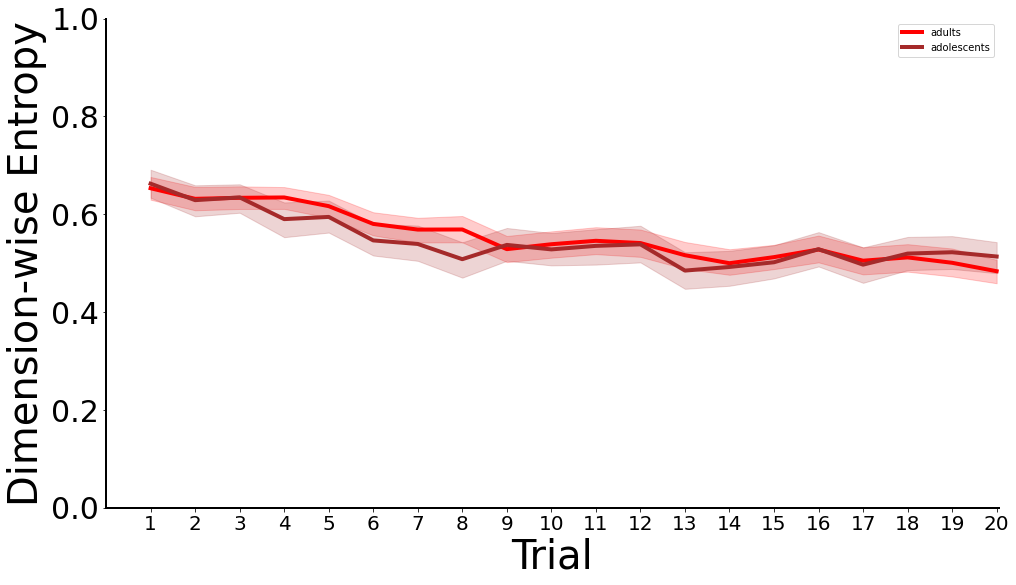

In [56]:
combined_df_adult = pd.melt(adult_combined_df, col_level=0, id_vars='WithinGameTrial', value_vars=['DimensionEntropy'])
combined_df_adole = pd.melt(adole_combined_df, col_level=0, id_vars='WithinGameTrial', value_vars=['DimensionEntropy'])

fig, ax = plt.subplots(figsize=(16,9))
sns.lineplot(x = 'WithinGameTrial', y="value", err_style="band", ci=95, data=combined_df_adult, lw=4, legend='brief', label='adults', color='red')
sns.lineplot(x = 'WithinGameTrial', y="value", err_style="band", ci=95, data=combined_df_adole, lw=4, legend='brief', label='adolescents',  color='brown')
sns.despine()
ax.set_xlim([0,game_length+.05])
ax.set_ylim([0,1])
ax.set_xticks(np.arange(game_length)+1)
xl = ax.set_xlabel('Trial',fontsize = 40);
yl = ax.set_ylabel('Dimension-wise Entropy',fontsize = 40);
for axis in ['top','bottom','left','right']:
      ax.spines[axis].set_linewidth(2)
ax.tick_params(axis='x',colors='k')
plt.xticks(fontsize=20);
plt.yticks(fontsize=30);

In [57]:
# separate adults and adolescents in learned vs not learned
learned_adole_df = adole_combined_df.loc[adole_combined_df['LearnedFeat']]
notlearned_adole_df = adole_combined_df.loc[adole_combined_df['LearnedFeat'] == False]

learned_adult_df = adult_combined_df.loc[adult_combined_df['LearnedFeat']]
notlearned_adult_df = adult_combined_df.loc[adult_combined_df['LearnedFeat'] == False]

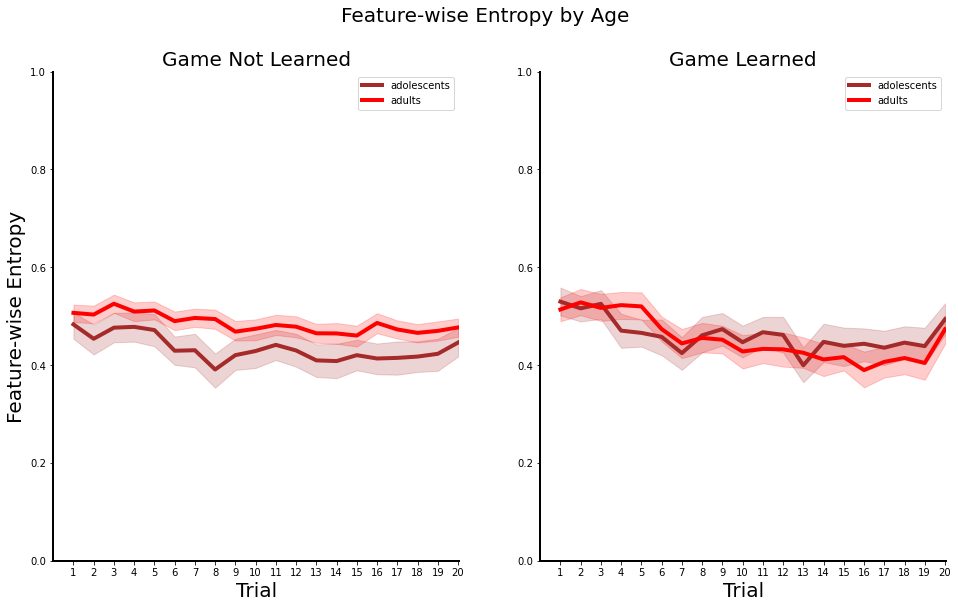

In [58]:
df_adole_learned = pd.melt(learned_adole_df, col_level=0, id_vars='WithinGameTrial', value_vars=['FeatureEntropy'])
df_adole_notlearned = pd.melt(notlearned_adole_df, col_level=0, id_vars='WithinGameTrial', value_vars=['FeatureEntropy'])
df_adult_learned = pd.melt(learned_adult_df, col_level=0, id_vars='WithinGameTrial', value_vars=['FeatureEntropy'])
df_adult_notlearned = pd.melt(notlearned_adult_df, col_level=0, id_vars='WithinGameTrial', value_vars=['FeatureEntropy'])

fig, (ax1, ax2) = plt.subplots(1 ,2, figsize=(16,9))
fig.suptitle('Feature-wise Entropy by Age',fontsize = 20)
ax1.set_title('Game Not Learned',fontsize = 20)
ax2.set_title('Game Learned',fontsize = 20)

l1 = sns.lineplot(ax = ax1, x = 'WithinGameTrial', y="value", err_style="band", ci=95, data=df_adole_notlearned, lw=4, legend='brief', label='adolescents', color='brown')
l2 = sns.lineplot(ax = ax2, x = 'WithinGameTrial', y="value", err_style="band", ci=95, data=df_adole_learned, lw=4, legend='brief', label='adolescents', color='brown')
l3 = sns.lineplot(ax = ax1, x = 'WithinGameTrial', y="value", err_style="band", ci=95, data=df_adult_notlearned, lw=4, legend='brief', label='adults',  color='red')
l4 = sns.lineplot(ax = ax2, x = 'WithinGameTrial', y="value", err_style="band", ci=95, data=df_adult_learned, lw=4, legend='brief', label='adults', color='red')
l2.set(ylabel=None)
sns.despine()
ax1.set_xlim([0,game_length+.05])
ax1.set_ylim([0,1])
ax1.set_xticks(np.arange(game_length)+1)
ax2.set_xlim([0,game_length+.05])
ax2.set_ylim([0,1])
ax2.set_xticks(np.arange(game_length)+1)
xl = ax1.set_xlabel('Trial',fontsize = 20);
yl = ax1.set_ylabel('Feature-wise Entropy',fontsize = 20);
xl = ax2.set_xlabel('Trial',fontsize = 20);
for axis in ['top','bottom','left','right']:
      ax1.spines[axis].set_linewidth(2)
      ax2.spines[axis].set_linewidth(2)
ax1.tick_params(axis='x',colors='k')
ax2.tick_params(axis='x',colors='k')

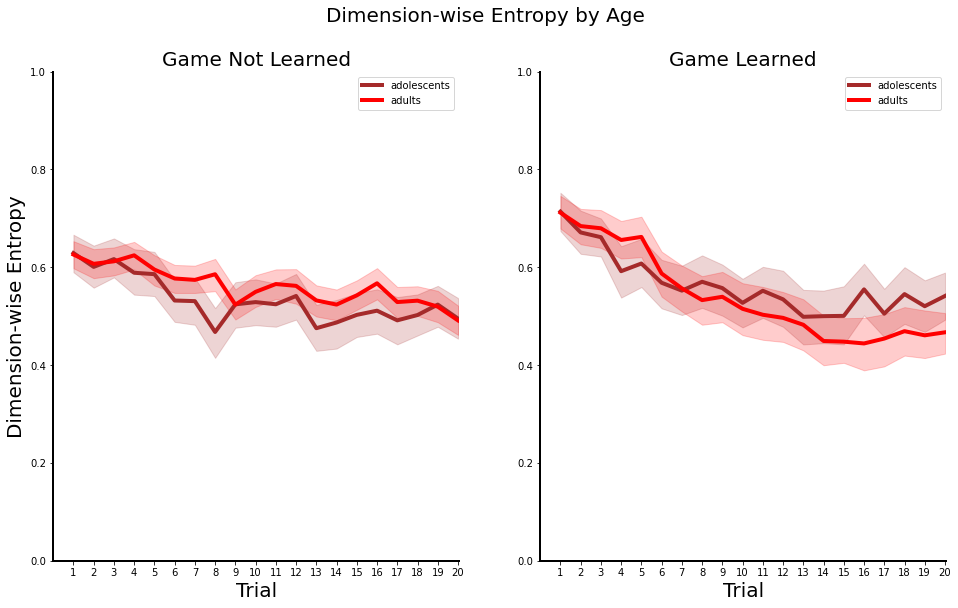

In [59]:
df_adole_learned = pd.melt(learned_adole_df, col_level=0, id_vars='WithinGameTrial', value_vars=['DimensionEntropy'])
df_adole_notlearned = pd.melt(notlearned_adole_df, col_level=0, id_vars='WithinGameTrial', value_vars=['DimensionEntropy'])
df_adult_learned = pd.melt(learned_adult_df, col_level=0, id_vars='WithinGameTrial', value_vars=['DimensionEntropy'])
df_adult_notlearned = pd.melt(notlearned_adult_df, col_level=0, id_vars='WithinGameTrial', value_vars=['DimensionEntropy'])

fig, (ax1, ax2) = plt.subplots(1 ,2, figsize=(16,9))
fig.suptitle('Dimension-wise Entropy by Age',fontsize = 20)
ax1.set_title('Game Not Learned',fontsize = 20)
ax2.set_title('Game Learned',fontsize = 20)

l1 = sns.lineplot(ax = ax1, x = 'WithinGameTrial', y="value", err_style="band", ci=95, data=df_adole_notlearned, lw=4, legend='brief', label='adolescents', color='brown')
l2 = sns.lineplot(ax = ax2, x = 'WithinGameTrial', y="value", err_style="band", ci=95, data=df_adole_learned, lw=4, legend='brief', label='adolescents', color='brown')
l3 = sns.lineplot(ax = ax1, x = 'WithinGameTrial', y="value", err_style="band", ci=95, data=df_adult_notlearned, lw=4, legend='brief', label='adults',  color='red')
l4 = sns.lineplot(ax = ax2, x = 'WithinGameTrial', y="value", err_style="band", ci=95, data=df_adult_learned, lw=4, legend='brief', label='adults', color='red')
l2.set(ylabel=None)
sns.despine()
ax1.set_xlim([0,game_length+.05])
ax1.set_ylim([0,1])
ax1.set_xticks(np.arange(game_length)+1)
ax2.set_xlim([0,game_length+.05])
ax2.set_ylim([0,1])
ax2.set_xticks(np.arange(game_length)+1)
xl = ax1.set_xlabel('Trial',fontsize = 20);
yl = ax1.set_ylabel('Dimension-wise Entropy',fontsize = 20);
xl = ax2.set_xlabel('Trial',fontsize = 20);
for axis in ['top','bottom','left','right']:
      ax1.spines[axis].set_linewidth(2)
      ax2.spines[axis].set_linewidth(2)
ax1.tick_params(axis='x',colors='k')
ax2.tick_params(axis='x',colors='k')

# Look across Games

In [60]:
new_df.keys()

Index(['Subj', 'Trial', 'Game', 'Stim11', 'Stim12', 'Stim13', 'Stim21',
       'Stim22', 'Stim23', 'Stim31', 'Stim32', 'Stim33', 'Choice', 'Chosen1',
       'Chosen2', 'Chosen3', 'Unchosen1', 'Unchosen2', 'Unchosen3',
       'Unchosen4', 'Unchosen5', 'Unchosen6', 'Outcome', 'Dim', 'Feat',
       'CenterDim', 'CenterFeat', 'Correct', 'LearnedFeat', 'PoL', 'RT',
       'WithinGameTrial', 'Adult', 'Age', 'Block', 'Feature1', 'Feature2',
       'Feature3', 'Feature4', 'Feature5', 'Feature6', 'Feature7', 'Feature8',
       'Feature9', 'Feature10', 'FeatureEntropy', 'Animals', 'Landscapes',
       'Objects', 'DimensionEntropy'],
      dtype='object')

In [61]:
adole_combined_df
adult_combined_df

,Subj,Trial,Game,Stim11,Stim12,Stim13,Stim21,Stim22,Stim23,Stim31,...,Feature6,Feature7,Feature8,Feature9,Feature10,FeatureEntropy,Animals,Landscapes,Objects,DimensionEntropy
400,26,1,1,1,4,8,2,5,9,3,...,0.063830,0.632699,0.000000,0.072788,0.117581,0.448943,0.054871,0.122060,0.705487,0.569136
401,26,2,1,2,4,8,3,6,9,1,...,0.488863,0.065651,0.000000,0.257913,0.106682,0.508812,0.004689,0.565064,0.323564,0.623605
402,26,3,1,1,6,7,3,5,8,2,...,0.000000,0.000000,0.064626,0.465986,0.078231,0.508420,0.085034,0.306122,0.530612,0.822715
403,26,4,1,3,5,7,1,6,9,2,...,0.301843,0.000000,0.000000,0.436636,0.154378,0.481781,0.054147,0.354839,0.436636,0.802538
404,26,5,1,1,6,9,2,4,8,3,...,0.254797,0.000000,0.153518,0.514925,0.076759,0.445685,0.000000,0.254797,0.668443,0.536238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,71,396,20,1,5,7,3,4,9,2,...,0.158747,0.109071,0.000000,0.490281,0.021598,0.592264,0.208423,0.170626,0.599352,0.850333
13996,71,397,20,1,5,8,2,4,9,3,...,0.000000,0.000000,0.000000,0.593079,0.056086,0.411844,0.130072,0.220764,0.593079,0.823688
13997,71,398,20,1,6,7,2,4,9,3,...,0.000000,0.000000,0.124040,0.403952,0.027442,0.602333,0.416026,0.028540,0.527991,0.726755
13998,71,399,20,1,6,7,3,5,8,2,...,0.036677,0.354908,0.266451,0.001079,0.019417,0.690990,0.166127,0.192017,0.622438,0.827024


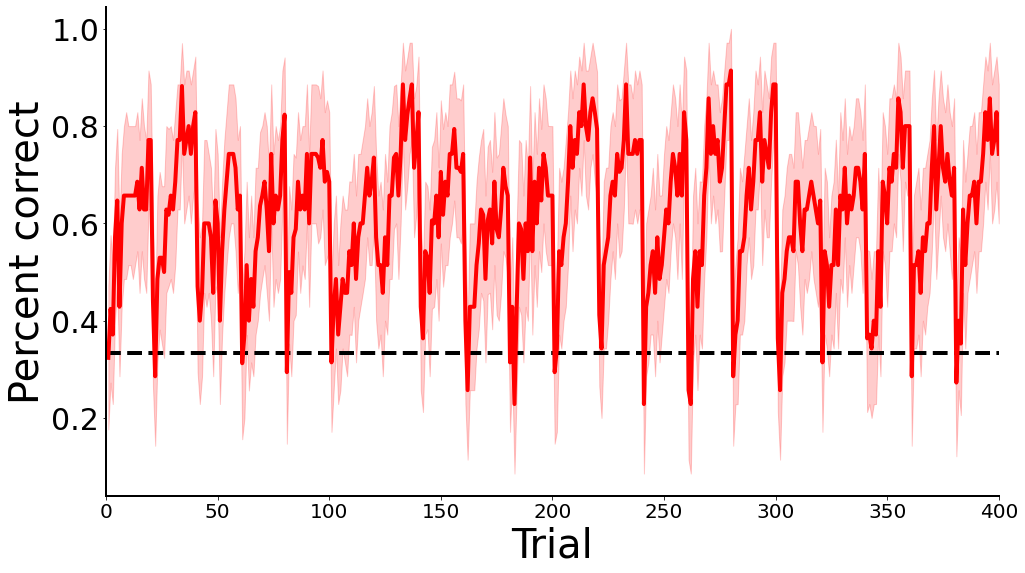

In [62]:
df = pd.melt(new_df, col_level=0, id_vars='Trial', value_vars=['Correct'])

fig, ax = plt.subplots(figsize=(16,9))
ax.axhline(y=1/3, color='k', lw=4, linestyle='--');
sns.lineplot(x = 'Trial', y="value", err_style="band", ci=95, data=df, lw=4, legend=False, color='red')
sns.despine()
ax.set_xlim([0,400+.05])
# ax.set_ylim([0.3,0.8])
# ax.set_xticks(np.arange(400)+1)
xl = ax.set_xlabel('Trial',fontsize = 40);
yl = ax.set_ylabel('Percent correct',fontsize = 40);
for axis in ['top','bottom','left','right']:
      ax.spines[axis].set_linewidth(2)
ax.tick_params(axis='x',colors='k')
plt.xticks(fontsize=20);
plt.yticks(fontsize=30);

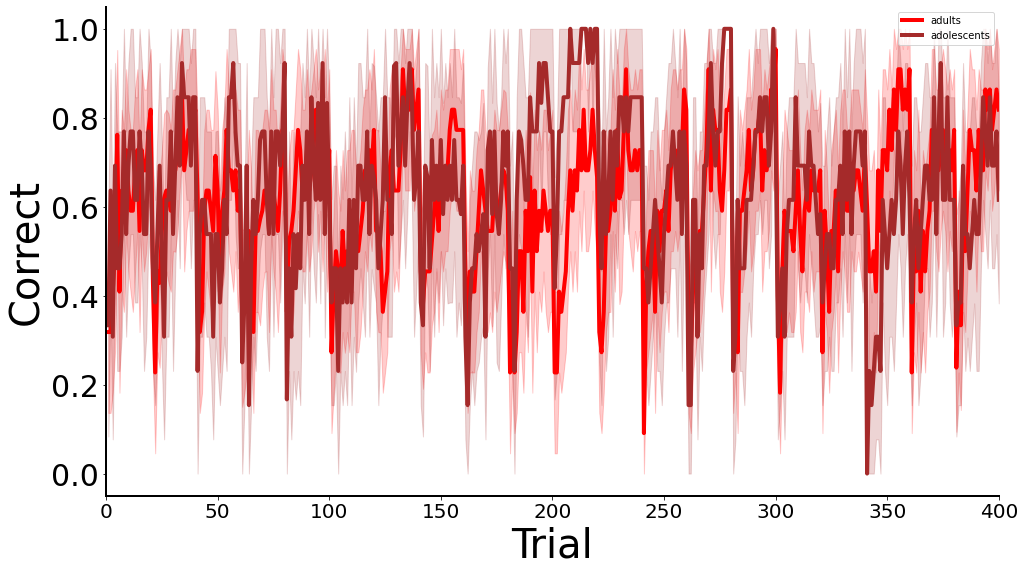

In [63]:
combined_df_adult = pd.melt(adult_combined_df, col_level=0, id_vars='Trial', value_vars=['Correct'])
combined_df_adole = pd.melt(adole_combined_df, col_level=0, id_vars='Trial', value_vars=['Correct'])

fig, ax = plt.subplots(figsize=(16,9))
sns.lineplot(x = 'Trial', y="value", err_style="band", ci=95, data=combined_df_adult, lw=4, legend='brief', label='adults', color='red')
sns.lineplot(x = 'Trial', y="value", err_style="band", ci=95, data=combined_df_adole, lw=4, legend='brief', label='adolescents',  color='brown')
sns.despine()
ax.set_xlim([0,400+.05])
# ax.set_ylim([0.3,1])
# ax.set_xticks(np.arange(game_length)+1)
xl = ax.set_xlabel('Trial',fontsize = 40);
yl = ax.set_ylabel('Correct',fontsize = 40);
for axis in ['top','bottom','left','right']:
      ax.spines[axis].set_linewidth(2)
ax.tick_params(axis='x',colors='k')
plt.xticks(fontsize=20);
plt.yticks(fontsize=30);

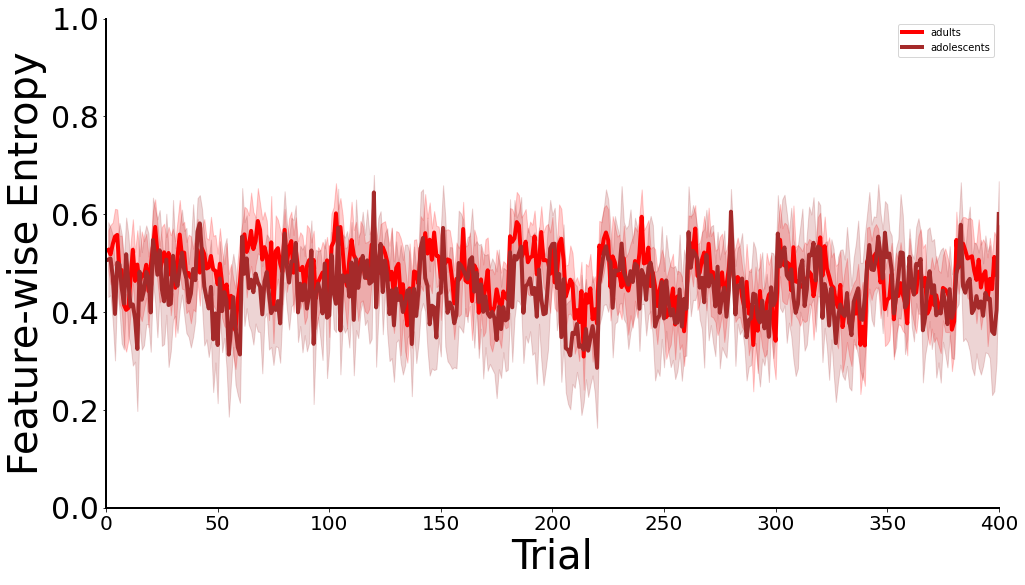

In [64]:
combined_df_adult = pd.melt(adult_combined_df, col_level=0, id_vars='Trial', value_vars=['FeatureEntropy'])
combined_df_adole = pd.melt(adole_combined_df, col_level=0, id_vars='Trial', value_vars=['FeatureEntropy'])

fig, ax = plt.subplots(figsize=(16,9))
sns.lineplot(x = 'Trial', y="value", err_style="band", ci=95, data=combined_df_adult, lw=4, legend='brief', label='adults', color='red')
sns.lineplot(x = 'Trial', y="value", err_style="band", ci=95, data=combined_df_adole, lw=4, legend='brief', label='adolescents',  color='brown')
sns.despine()
ax.set_xlim([0,400+.05])
ax.set_ylim([0,1])
# ax.set_xticks(np.arange(game_length)+1)
xl = ax.set_xlabel('Trial',fontsize = 40);
yl = ax.set_ylabel('Feature-wise Entropy',fontsize = 40);
for axis in ['top','bottom','left','right']:
      ax.spines[axis].set_linewidth(2)
ax.tick_params(axis='x',colors='k')
plt.xticks(fontsize=20);
plt.yticks(fontsize=30);

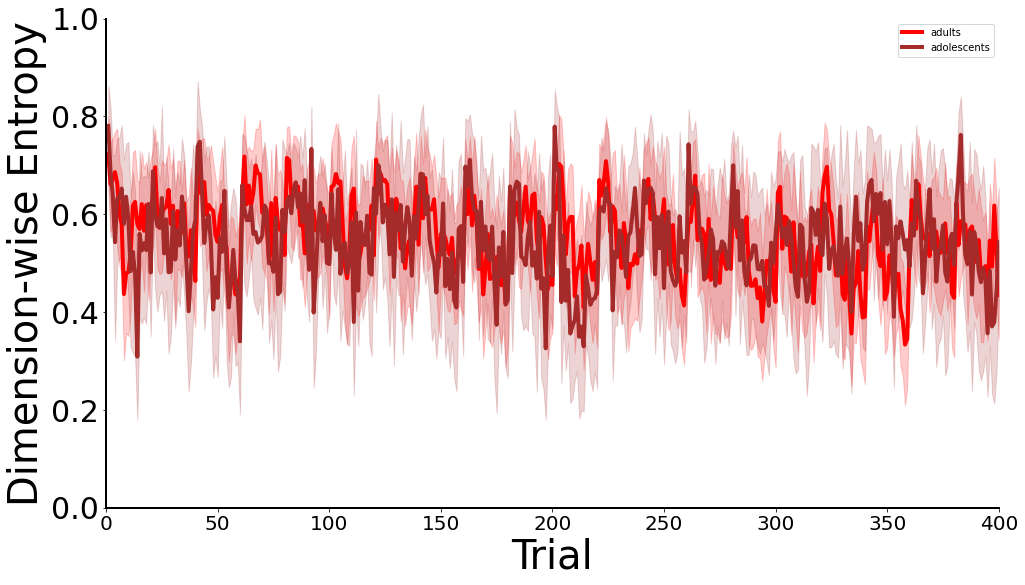

In [65]:
combined_df_adult = pd.melt(adult_combined_df, col_level=0, id_vars='Trial', value_vars=['DimensionEntropy'])
combined_df_adole = pd.melt(adole_combined_df, col_level=0, id_vars='Trial', value_vars=['DimensionEntropy'])

fig, ax = plt.subplots(figsize=(16,9))
sns.lineplot(x = 'Trial', y="value", err_style="band", ci=95, data=combined_df_adult, lw=4, legend='brief', label='adults', color='red')
sns.lineplot(x = 'Trial', y="value", err_style="band", ci=95, data=combined_df_adole, lw=4, legend='brief', label='adolescents',  color='brown')
sns.despine()
ax.set_xlim([0,400+.05])
ax.set_ylim([0,1])
# ax.set_xticks(np.arange(game_length)+1)
xl = ax.set_xlabel('Trial',fontsize = 40);
yl = ax.set_ylabel('Dimension-wise Entropy',fontsize = 40);
for axis in ['top','bottom','left','right']:
      ax.spines[axis].set_linewidth(2)
ax.tick_params(axis='x',colors='k')
plt.xticks(fontsize=20);
plt.yticks(fontsize=30);

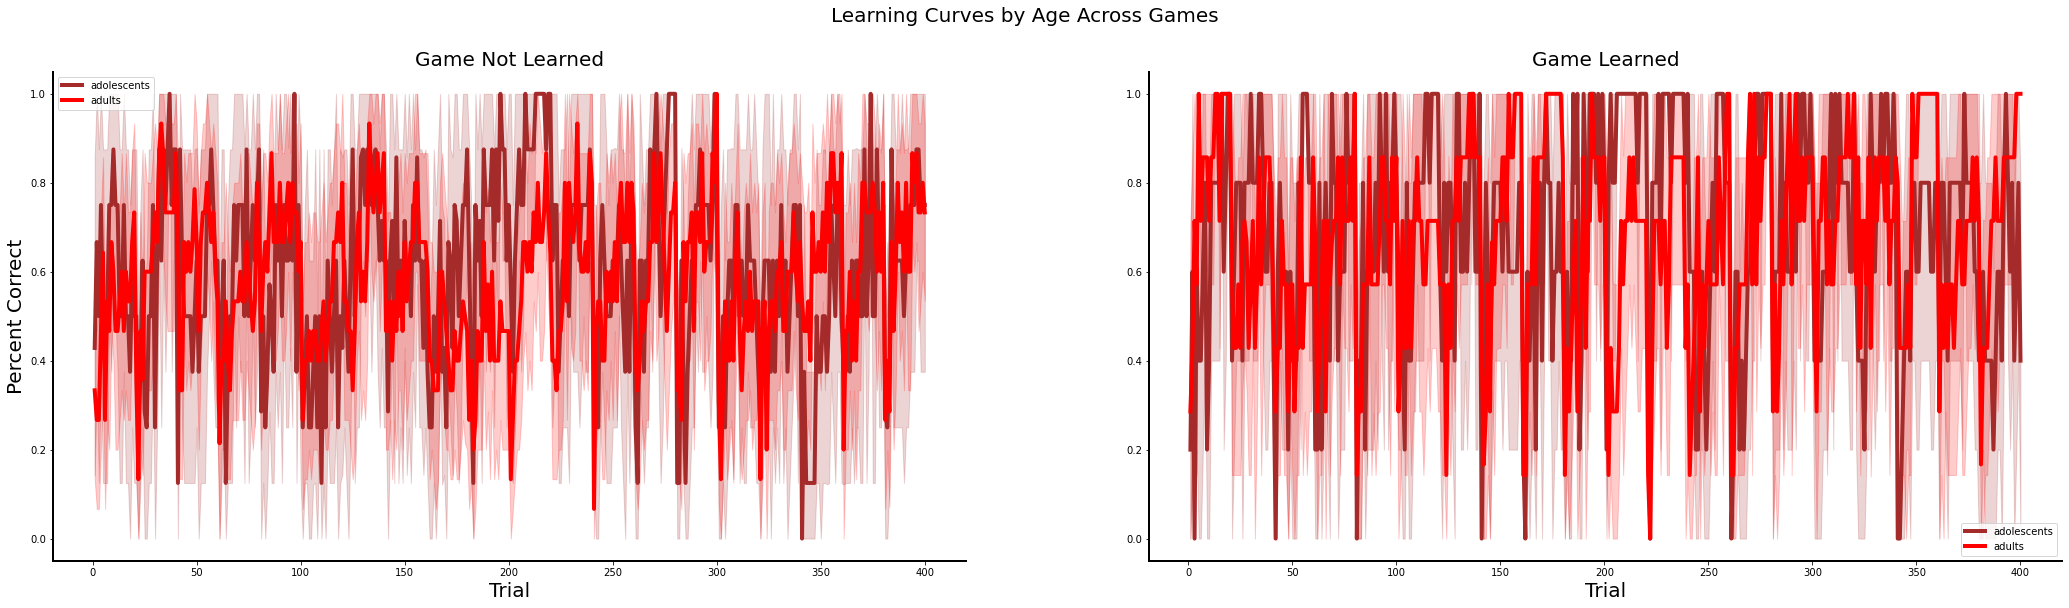

In [66]:
df_adole_learned = pd.melt(learned_adole_df, col_level=0, id_vars='Trial', value_vars=['Correct'])
df_adole_notlearned = pd.melt(notlearned_adole_df, col_level=0, id_vars='Trial', value_vars=['Correct'])
df_adult_learned = pd.melt(learned_adult_df, col_level=0, id_vars='Trial', value_vars=['Correct'])
df_adult_notlearned = pd.melt(notlearned_adult_df, col_level=0, id_vars='Trial', value_vars=['Correct'])

fig, (ax1, ax2) = plt.subplots(1 ,2, figsize=(36,9))
fig.suptitle('Learning Curves by Age Across Games',fontsize = 20)
ax1.set_title('Game Not Learned',fontsize = 20)
ax2.set_title('Game Learned',fontsize = 20)

l1 = sns.lineplot(ax = ax1, x = 'Trial', y="value", err_style="band", ci=95, data=df_adole_notlearned, lw=4, legend='brief', label='adolescents', color='brown')
l2 = sns.lineplot(ax = ax2, x = 'Trial', y="value", err_style="band", ci=95, data=df_adole_learned, lw=4, legend='brief', label='adolescents', color='brown')
l3 = sns.lineplot(ax = ax1, x = 'Trial', y="value", err_style="band", ci=95, data=df_adult_notlearned, lw=4, legend='brief', label='adults',  color='red')
l4 = sns.lineplot(ax = ax2, x = 'Trial', y="value", err_style="band", ci=95, data=df_adult_learned, lw=4, legend='brief', label='adults', color='red')
l2.set(ylabel=None)
sns.despine()
# # ax1.set_xlim([0,game_length+.05])
# ax1.set_ylim([-0.5,1.5])
# ax1.set_xticks(np.arange(game_length)+1)
# ax2.set_xlim([0,game_length+.05])
# ax1.set_ylim([-0.5,1.5])
# ax2.set_xticks(np.arange(game_length)+1)
xl = ax1.set_xlabel('Trial',fontsize = 20);
yl = ax1.set_ylabel('Percent Correct',fontsize = 20);
xl = ax2.set_xlabel('Trial',fontsize = 20);
for axis in ['top','bottom','left','right']:
      ax1.spines[axis].set_linewidth(2)
      ax2.spines[axis].set_linewidth(2)
ax1.tick_params(axis='x',colors='k')
ax2.tick_params(axis='x',colors='k')

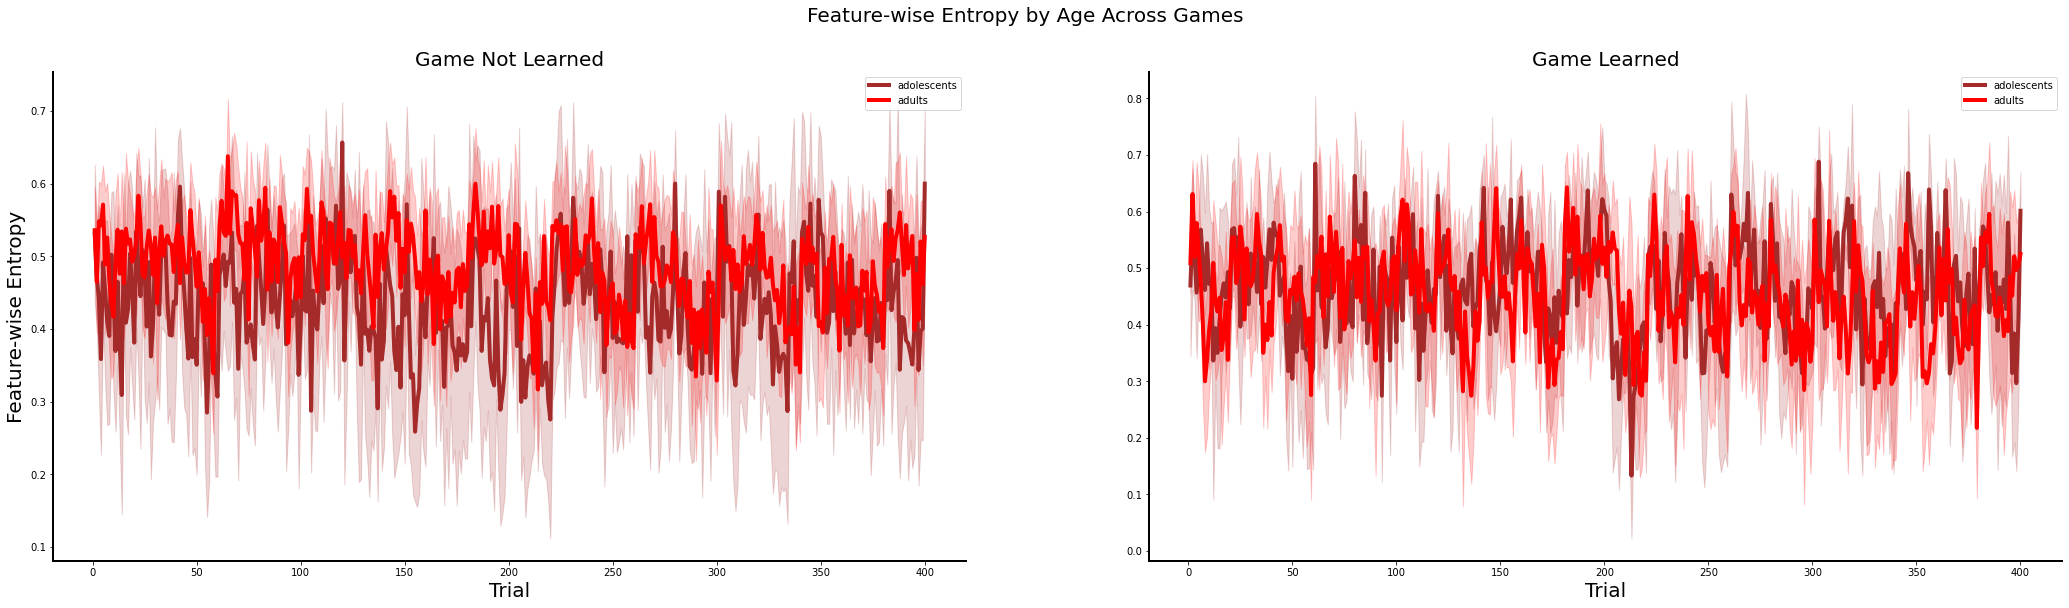

In [67]:
df_adole_learned = pd.melt(learned_adole_df, col_level=0, id_vars='Trial', value_vars=['FeatureEntropy'])
df_adole_notlearned = pd.melt(notlearned_adole_df, col_level=0, id_vars='Trial', value_vars=['FeatureEntropy'])
df_adult_learned = pd.melt(learned_adult_df, col_level=0, id_vars='Trial', value_vars=['FeatureEntropy'])
df_adult_notlearned = pd.melt(notlearned_adult_df, col_level=0, id_vars='Trial', value_vars=['FeatureEntropy'])

fig, (ax1, ax2) = plt.subplots(1 ,2, figsize=(36,9))
fig.suptitle('Feature-wise Entropy by Age Across Games',fontsize = 20)
ax1.set_title('Game Not Learned',fontsize = 20)
ax2.set_title('Game Learned',fontsize = 20)

l1 = sns.lineplot(ax = ax1, x = 'Trial', y="value", err_style="band", ci=95, data=df_adole_notlearned, lw=4, legend='brief', label='adolescents', color='brown')
l2 = sns.lineplot(ax = ax2, x = 'Trial', y="value", err_style="band", ci=95, data=df_adole_learned, lw=4, legend='brief', label='adolescents', color='brown')
l3 = sns.lineplot(ax = ax1, x = 'Trial', y="value", err_style="band", ci=95, data=df_adult_notlearned, lw=4, legend='brief', label='adults',  color='red')
l4 = sns.lineplot(ax = ax2, x = 'Trial', y="value", err_style="band", ci=95, data=df_adult_learned, lw=4, legend='brief', label='adults', color='red')
l2.set(ylabel=None)
sns.despine()
# ax1.set_xlim([0,game_length+.05])
# ax1.set_ylim([0,1])
# ax1.set_xticks(np.arange(game_length)+1)
# ax2.set_xlim([0,game_length+.05])
# ax2.set_ylim([0,1])
# ax2.set_xticks(np.arange(game_length)+1)
xl = ax1.set_xlabel('Trial',fontsize = 20);
yl = ax1.set_ylabel('Feature-wise Entropy',fontsize = 20);
xl = ax2.set_xlabel('Trial',fontsize = 20);
for axis in ['top','bottom','left','right']:
      ax1.spines[axis].set_linewidth(2)
      ax2.spines[axis].set_linewidth(2)
ax1.tick_params(axis='x',colors='k')
ax2.tick_params(axis='x',colors='k')

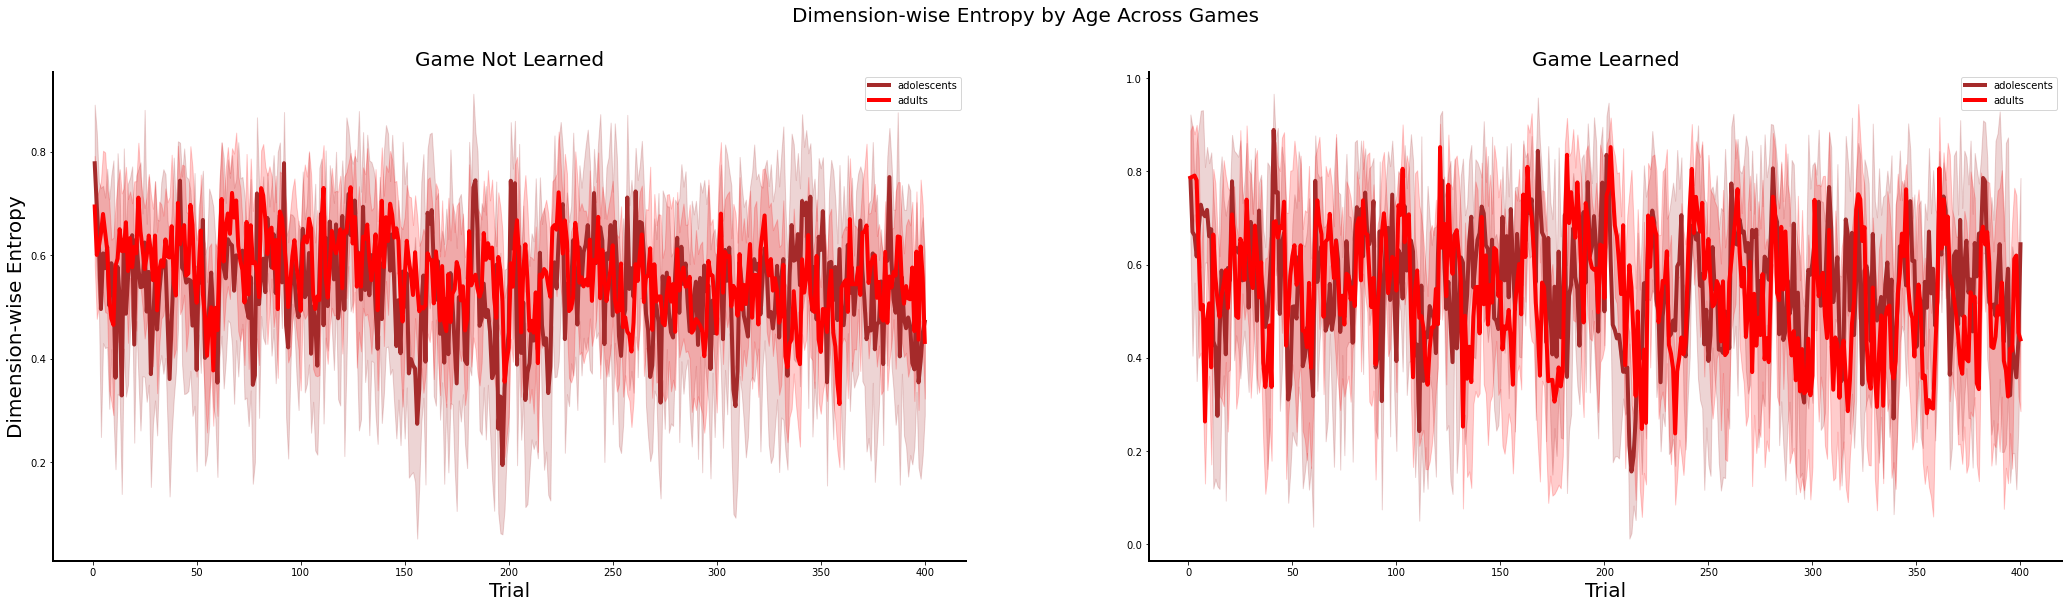

In [68]:
df_adole_learned = pd.melt(learned_adole_df, col_level=0, id_vars='Trial', value_vars=['DimensionEntropy'])
df_adole_notlearned = pd.melt(notlearned_adole_df, col_level=0, id_vars='Trial', value_vars=['DimensionEntropy'])
df_adult_learned = pd.melt(learned_adult_df, col_level=0, id_vars='Trial', value_vars=['DimensionEntropy'])
df_adult_notlearned = pd.melt(notlearned_adult_df, col_level=0, id_vars='Trial', value_vars=['DimensionEntropy'])

fig, (ax1, ax2) = plt.subplots(1 ,2, figsize=(36,9))
fig.suptitle('Dimension-wise Entropy by Age Across Games',fontsize = 20)
ax1.set_title('Game Not Learned',fontsize = 20)
ax2.set_title('Game Learned',fontsize = 20)

l1 = sns.lineplot(ax = ax1, x = 'Trial', y="value", err_style="band", ci=95, data=df_adole_notlearned, lw=4, legend='brief', label='adolescents', color='brown')
l2 = sns.lineplot(ax = ax2, x = 'Trial', y="value", err_style="band", ci=95, data=df_adole_learned, lw=4, legend='brief', label='adolescents', color='brown')
l3 = sns.lineplot(ax = ax1, x = 'Trial', y="value", err_style="band", ci=95, data=df_adult_notlearned, lw=4, legend='brief', label='adults',  color='red')
l4 = sns.lineplot(ax = ax2, x = 'Trial', y="value", err_style="band", ci=95, data=df_adult_learned, lw=4, legend='brief', label='adults', color='red')
l2.set(ylabel=None)
sns.despine()
# ax1.set_xlim([0,game_length+.05])
# ax1.set_ylim([0,1])
# ax1.set_xticks(np.arange(game_length)+1)
# ax2.set_xlim([0,game_length+.05])
# ax2.set_ylim([0,1])
# ax2.set_xticks(np.arange(game_length)+1)
xl = ax1.set_xlabel('Trial',fontsize = 20);
yl = ax1.set_ylabel('Dimension-wise Entropy',fontsize = 20);
xl = ax2.set_xlabel('Trial',fontsize = 20);
for axis in ['top','bottom','left','right']:
      ax1.spines[axis].set_linewidth(2)
      ax2.spines[axis].set_linewidth(2)
ax1.tick_params(axis='x',colors='k')
ax2.tick_params(axis='x',colors='k')

# Reaction Time Analyses

In [269]:
combined_df = new_df.copy()
combined_df.keys()

Index(['Subj', 'Trial', 'Game', 'Stim11', 'Stim12', 'Stim13', 'Stim21',
       'Stim22', 'Stim23', 'Stim31', 'Stim32', 'Stim33', 'Choice', 'Chosen1',
       'Chosen2', 'Chosen3', 'Unchosen1', 'Unchosen2', 'Unchosen3',
       'Unchosen4', 'Unchosen5', 'Unchosen6', 'Outcome', 'Dim', 'Feat',
       'CenterDim', 'CenterFeat', 'Correct', 'LearnedFeat', 'PoL', 'RT',
       'WithinGameTrial', 'Adult', 'Age', 'Block', 'Feature1', 'Feature2',
       'Feature3', 'Feature4', 'Feature5', 'Feature6', 'Feature7', 'Feature8',
       'Feature9', 'Feature10', 'TotalLookingTime', 'FeatureEntropy',
       'Animals', 'Landscapes', 'Objects', 'DimensionEntropy'],
      dtype='object')

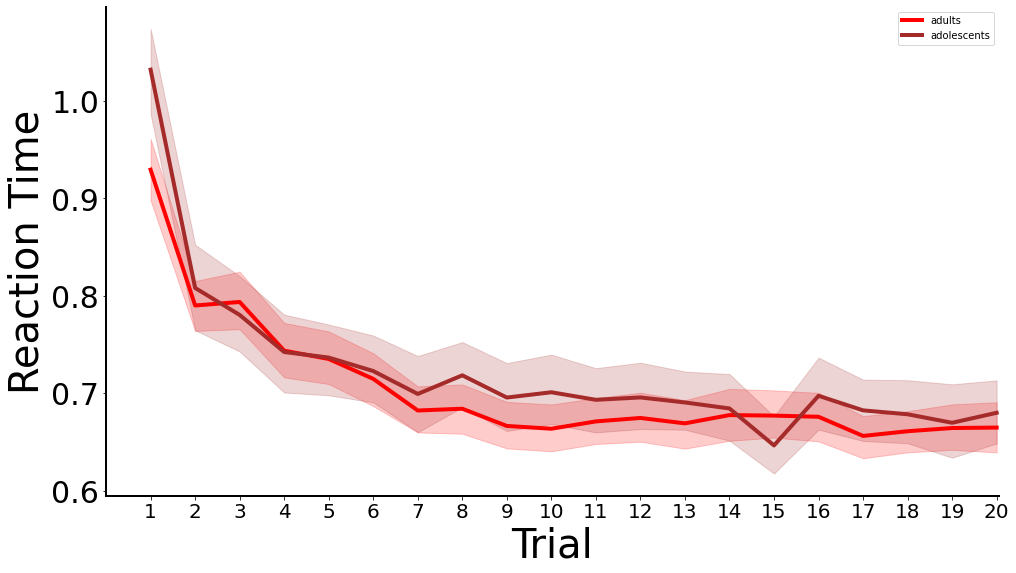

In [261]:
combined_df_adult = pd.melt(adult_combined_df, col_level=0, id_vars='WithinGameTrial', value_vars=['RT'])
combined_df_adole = pd.melt(adole_combined_df, col_level=0, id_vars='WithinGameTrial', value_vars=['RT'])

fig, ax = plt.subplots(figsize=(16,9))
sns.lineplot(x = 'WithinGameTrial', y="value", err_style="band", ci=95, data=combined_df_adult, lw=4, legend='brief', label='adults', color='red')
sns.lineplot(x = 'WithinGameTrial', y="value", err_style="band", ci=95, data=combined_df_adole, lw=4, legend='brief', label='adolescents',  color='brown')
sns.despine()
ax.set_xlim([0,game_length+.05])
# ax.set_ylim([0,1])
ax.set_xticks(np.arange(game_length)+1)
xl = ax.set_xlabel('Trial',fontsize = 40);
yl = ax.set_ylabel('Reaction Time',fontsize = 40);
for axis in ['top','bottom','left','right']:
      ax.spines[axis].set_linewidth(2)
ax.tick_params(axis='x',colors='k')
plt.xticks(fontsize=20);
plt.yticks(fontsize=30);

# Relative looking time analyses with pre-choice fixations

In [246]:
## Define global variables ##
et_data_dir = os.getcwd() + '/ProcessedData/'# this expects ProcessedData to be in the analysis repo
image_dir = os.getcwd().strip('ldm-analysis') + 'FinalStimuli/ByNumber/'
raw_data_dir = os.getcwd().strip('ldm-analysis') + 'RawData/' # this expects RawData to be one directory up from the analysis repo

## Define screen metadata.
xdim, ydim, n_screens = 1280, 1024, 1 
aoisidelength = 162
n_aois = 9

# Define list with all subject ids; remove 33, 66, and 58 for ec and preproc troubles
good_subjects =  [23, 26, 27, 28, 29, 30, 31, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 53, 54, 
                 55, 57, 60, 61, 62, 63, 67, 68, 69, 70, 71];

In [247]:
pre_choice_looking_time_df = {}
for subj_id in good_subjects:
    fixations = pd.read_csv(et_data_dir + str(subj_id) + 'pre-choice_fixations.csv')
    duration_summary = fixations.groupby(['Trial', 'Block','Feature'])['Duration'].sum()
    pre_choice_looking_time_df['Sub' + str(subj_id)] = duration_summary
pre_choice_looking_time_df = pd.DataFrame(pre_choice_looking_time_df).fillna(0).reset_index()

In [248]:
pre_choice_looking_time_df = pd.wide_to_long(pre_choice_looking_time_df, 'Sub', i=['Trial', 'Block', 'Feature'], j="Subj").rename(columns={"Sub": "Duration"}).unstack(level='Feature').fillna(0).reset_index()

In [249]:
pre_choice_looking_time_df.isnull().sum()

          Feature
Trial                0
Block                0
Subj                 0
Duration  1.0        0
          2.0        0
          3.0        0
          4.0        0
          5.0        0
          6.0        0
          7.0        0
          8.0        0
          9.0        0
          10.0       0
dtype: int64

In [250]:
for index, row in pre_choice_looking_time_df.iterrows():
    total_looking_time = row.Duration.sum()
    pre_choice_looking_time_df.loc[index, 'TotalLookingTime'] = total_looking_time
pre_choice_looking_time_df.columns = pre_choice_looking_time_df.columns.to_flat_index()
pre_choice_looking_time_df = pre_choice_looking_time_df.rename(columns={('Duration',  1.0): 'Feature1',('Duration',  2.0): 'Feature2', ('Duration',  3.0): 'Feature3',
                        ('Duration',  4.0): 'Feature4',('Duration',  5.0): 'Feature5', ('Duration',  6.0): 'Feature6',
                        ('Duration',  7.0): 'Feature7',('Duration',  8.0): 'Feature8', ('Duration',  9.0): 'Feature9',
                        ('Duration',  10.0): 'Feature10', ('Trial', ''):'Trial', ('Block', ''):'Block',
                        ('Subj', ''):'Subj', ('TotalLookingTime', ''):'TotalLookingTime'})

In [251]:
pre_choice_looking_time_df.to_csv("ProcessedData/PreChoice_LookingTimes.csv", index = False)

In [252]:
relative_looking_time_df = pre_choice_looking_time_df.copy()

for featnum in np.arange(10)+1:
    relative_looking_time_df['Feature'+ str(featnum)] = relative_looking_time_df['Feature'+ str(featnum)]/relative_looking_time_df['TotalLookingTime']

relative_looking_time_df = relative_looking_time_df.fillna(0)
relative_looking_time_df.isnull().sum()

## Entropy across features

In [254]:
entropy_col = []
for index, row in relative_looking_time_df.iterrows():
    if row.TotalLookingTime != 0:
        curr_entropy = calculateEntropy([row.Feature1, row.Feature2, row.Feature3, row.Feature4, row.Feature5, row.Feature6, row.Feature7, row.Feature8, row.Feature9], base=9)
        entropy_col.append(curr_entropy)
    else:
        entropy_col.append(0)
relative_looking_time_df['FeatureEntropy'] = entropy_col

## Entropy across dimensions

In [255]:
# sum relative looking time over dimensions
relative_looking_time_df['Animals'] = relative_looking_time_df['Feature1'] + relative_looking_time_df['Feature2'] + relative_looking_time_df['Feature3']
relative_looking_time_df['Landscapes'] = relative_looking_time_df['Feature4'] + relative_looking_time_df['Feature5'] + relative_looking_time_df['Feature6']
relative_looking_time_df['Objects'] = relative_looking_time_df['Feature7'] + relative_looking_time_df['Feature8'] + relative_looking_time_df['Feature9']

entropy_col = []
for index, row in relative_looking_time_df.iterrows():
    if row.TotalLookingTime != 0:
        curr_entropy = calculateEntropy([row.Animals, row.Landscapes, row.Objects], base=3)
        entropy_col.append(curr_entropy)
    else:
        entropy_col.append(0)
relative_looking_time_df['DimensionEntropy'] = entropy_col

In [256]:
relative_looking_time_df.isnull().sum()

Trial               0
Block               0
Subj                0
Feature1            0
Feature2            0
Feature3            0
Feature4            0
Feature5            0
Feature6            0
Feature7            0
Feature8            0
Feature9            0
Feature10           0
TotalLookingTime    0
FeatureEntropy      0
Animals             0
Landscapes          0
Objects             0
DimensionEntropy    0
dtype: int64

In [257]:
relative_looking_time_df.to_csv("ProcessedData/PreChoice_RelativeLookingTimes.csv", index = False)

In [258]:
good_behav_data = behav_data[behav_data['Subj'] != 33]
good_behav_data = good_behav_data[good_behav_data['Subj'] != 66]
good_behav_data = good_behav_data[good_behav_data['Subj'] != 58]
good_behav_data = good_behav_data.reset_index(drop=True)
new_df = pd.merge(good_behav_data, relative_looking_time_df,  how='left', on=['Subj','Trial'])

In [259]:
# read out combined dataframe for easy access
new_df.to_csv("ProcessedData/PreChoice_CombinedBehavioralEyeTrackingData.csv", index=False)

In [80]:
new_df[['WithinGameTrial', 'FeatureEntropy','DimensionEntropy']].loc[new_df[['WithinGameTrial', 'FeatureEntropy','DimensionEntropy']]['WithinGameTrial'] == 1].mean()

WithinGameTrial     1.000000
FeatureEntropy      0.298084
DimensionEntropy    0.403127
dtype: float64

In [81]:
new_df[['WithinGameTrial', 'FeatureEntropy','DimensionEntropy']].loc[new_df[['WithinGameTrial', 'FeatureEntropy','DimensionEntropy']]['WithinGameTrial'] == 19].mean()

WithinGameTrial     19.000000
FeatureEntropy       0.193816
DimensionEntropy     0.215375
dtype: float64

In [82]:
adole_combined_df = new_df[new_df['Adult'] == False]
adult_combined_df = new_df[new_df['Adult']]

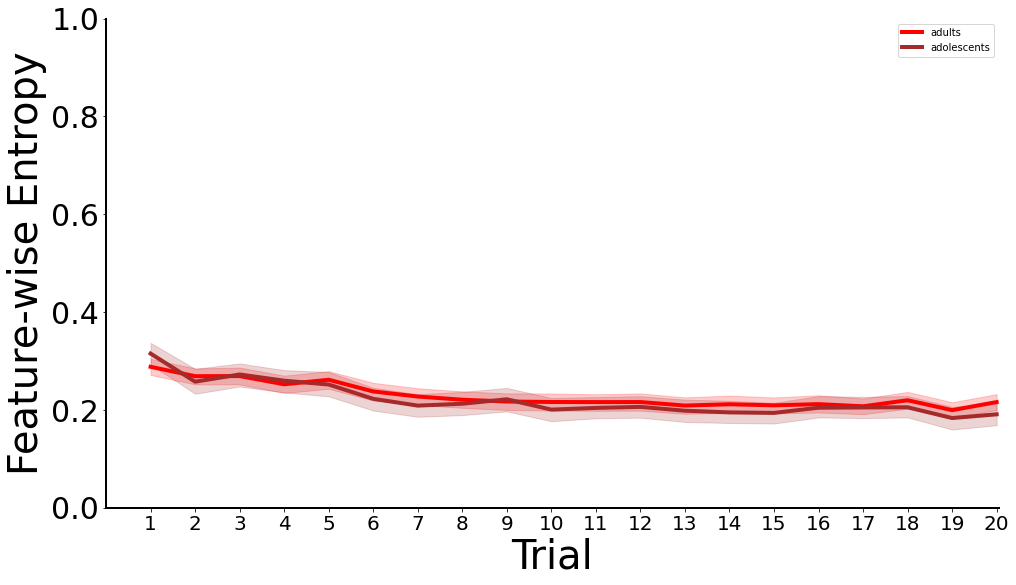

In [83]:
combined_df_adult = pd.melt(adult_combined_df, col_level=0, id_vars='WithinGameTrial', value_vars=['FeatureEntropy'])
combined_df_adole = pd.melt(adole_combined_df, col_level=0, id_vars='WithinGameTrial', value_vars=['FeatureEntropy'])

fig, ax = plt.subplots(figsize=(16,9))
sns.lineplot(x = 'WithinGameTrial', y="value", err_style="band", ci=95, data=combined_df_adult, lw=4, legend='brief', label='adults', color='red')
sns.lineplot(x = 'WithinGameTrial', y="value", err_style="band", ci=95, data=combined_df_adole, lw=4, legend='brief', label='adolescents',  color='brown')
sns.despine()
ax.set_xlim([0,game_length+.05])
ax.set_ylim([0,1])
ax.set_xticks(np.arange(game_length)+1)
xl = ax.set_xlabel('Trial',fontsize = 40);
yl = ax.set_ylabel('Feature-wise Entropy',fontsize = 40);
for axis in ['top','bottom','left','right']:
      ax.spines[axis].set_linewidth(2)
ax.tick_params(axis='x',colors='k')
plt.xticks(fontsize=20);
plt.yticks(fontsize=30);

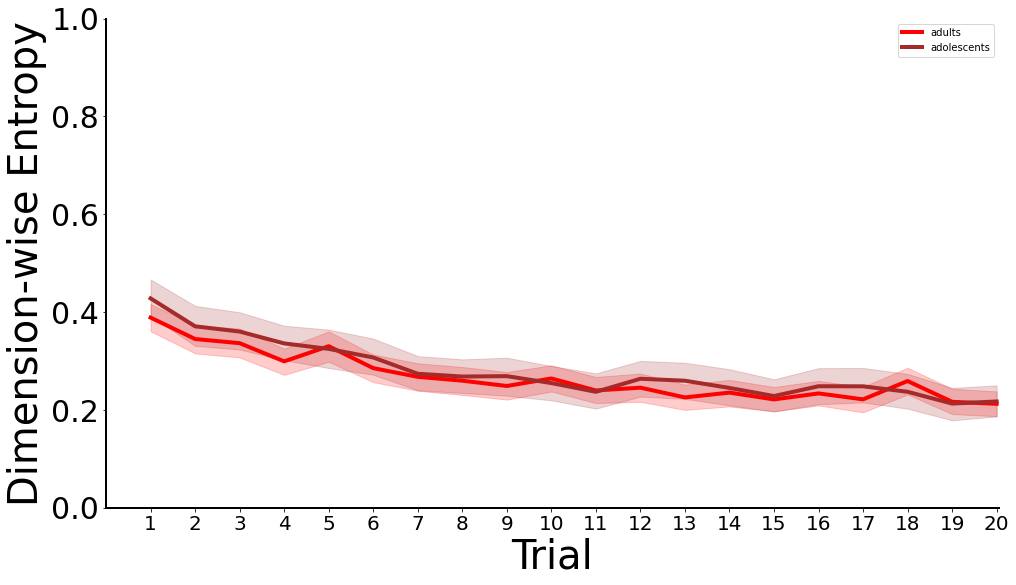

In [84]:
combined_df_adult = pd.melt(adult_combined_df, col_level=0, id_vars='WithinGameTrial', value_vars=['DimensionEntropy'])
combined_df_adole = pd.melt(adole_combined_df, col_level=0, id_vars='WithinGameTrial', value_vars=['DimensionEntropy'])

fig, ax = plt.subplots(figsize=(16,9))
sns.lineplot(x = 'WithinGameTrial', y="value", err_style="band", ci=95, data=combined_df_adult, lw=4, legend='brief', label='adults', color='red')
sns.lineplot(x = 'WithinGameTrial', y="value", err_style="band", ci=95, data=combined_df_adole, lw=4, legend='brief', label='adolescents',  color='brown')
sns.despine()
ax.set_xlim([0,game_length+.05])
ax.set_ylim([0,1])
ax.set_xticks(np.arange(game_length)+1)
xl = ax.set_xlabel('Trial',fontsize = 40);
yl = ax.set_ylabel('Dimension-wise Entropy',fontsize = 40);
for axis in ['top','bottom','left','right']:
      ax.spines[axis].set_linewidth(2)
ax.tick_params(axis='x',colors='k')
plt.xticks(fontsize=20);
plt.yticks(fontsize=30);

In [85]:
# separate adults and adolescents in learned vs not learned
learned_adole_df = adole_combined_df.loc[adole_combined_df['LearnedFeat']]
notlearned_adole_df = adole_combined_df.loc[adole_combined_df['LearnedFeat'] == False]

learned_adult_df = adult_combined_df.loc[adult_combined_df['LearnedFeat']]
notlearned_adult_df = adult_combined_df.loc[adult_combined_df['LearnedFeat'] == False]

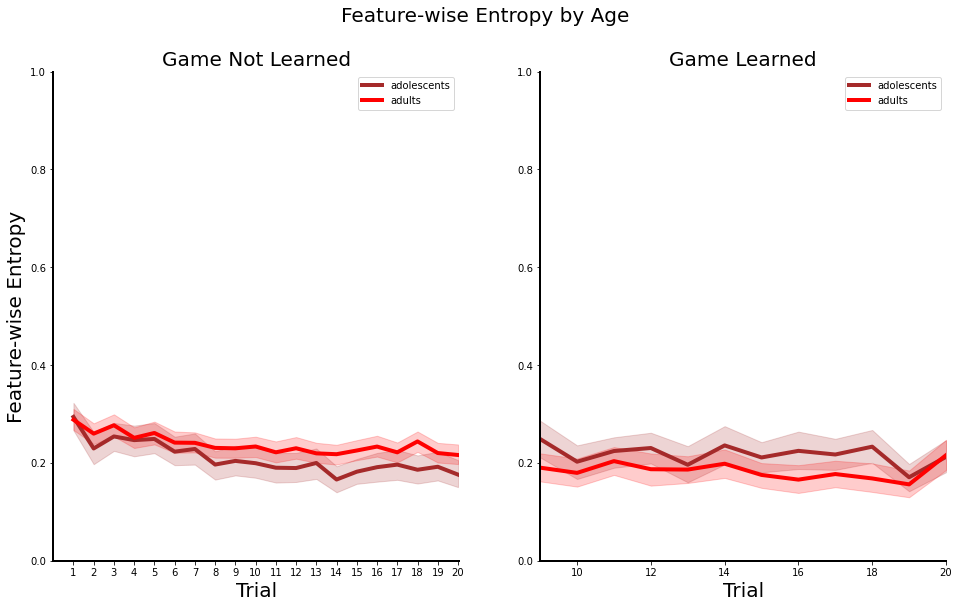

In [86]:
df_adole_learned = pd.melt(learned_adole_df, col_level=0, id_vars='WithinGameTrial', value_vars=['FeatureEntropy'])
df_adole_notlearned = pd.melt(notlearned_adole_df, col_level=0, id_vars='WithinGameTrial', value_vars=['FeatureEntropy'])
df_adult_learned = pd.melt(learned_adult_df, col_level=0, id_vars='WithinGameTrial', value_vars=['FeatureEntropy'])
df_adult_notlearned = pd.melt(notlearned_adult_df, col_level=0, id_vars='WithinGameTrial', value_vars=['FeatureEntropy'])

fig, (ax1, ax2) = plt.subplots(1 ,2, figsize=(16,9))
fig.suptitle('Feature-wise Entropy by Age',fontsize = 20)
ax1.set_title('Game Not Learned',fontsize = 20)
ax2.set_title('Game Learned',fontsize = 20)

l1 = sns.lineplot(ax = ax1, x = 'WithinGameTrial', y="value", err_style="band", ci=95, data=df_adole_notlearned, lw=4, legend='brief', label='adolescents', color='brown')
l2 = sns.lineplot(ax = ax2, x = 'WithinGameTrial', y="value", err_style="band", ci=95, data=df_adole_learned, lw=4, legend='brief', label='adolescents', color='brown')
l3 = sns.lineplot(ax = ax1, x = 'WithinGameTrial', y="value", err_style="band", ci=95, data=df_adult_notlearned, lw=4, legend='brief', label='adults',  color='red')
l4 = sns.lineplot(ax = ax2, x = 'WithinGameTrial', y="value", err_style="band", ci=95, data=df_adult_learned, lw=4, legend='brief', label='adults', color='red')
l2.set(ylabel=None)
sns.despine()
ax1.set_xlim([0,game_length+.05])
ax1.set_ylim([0,1])
ax1.set_xticks(np.arange(game_length)+1)
ax2.set_xlim([9,game_length])
ax2.set_ylim([0,1])
# ax2.set_xticks(np.arange(game_length)+1)
xl = ax1.set_xlabel('Trial',fontsize = 20);
yl = ax1.set_ylabel('Feature-wise Entropy',fontsize = 20);
xl = ax2.set_xlabel('Trial',fontsize = 20);
for axis in ['top','bottom','left','right']:
      ax1.spines[axis].set_linewidth(2)
      ax2.spines[axis].set_linewidth(2)
ax1.tick_params(axis='x',colors='k')
ax2.tick_params(axis='x',colors='k')

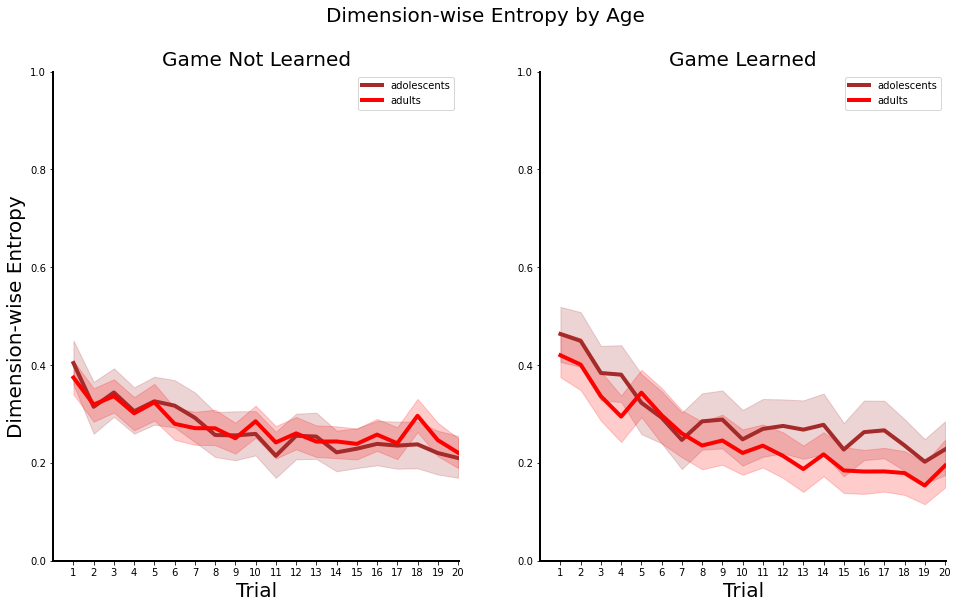

In [87]:
df_adole_learned = pd.melt(learned_adole_df, col_level=0, id_vars='WithinGameTrial', value_vars=['DimensionEntropy'])
df_adole_notlearned = pd.melt(notlearned_adole_df, col_level=0, id_vars='WithinGameTrial', value_vars=['DimensionEntropy'])
df_adult_learned = pd.melt(learned_adult_df, col_level=0, id_vars='WithinGameTrial', value_vars=['DimensionEntropy'])
df_adult_notlearned = pd.melt(notlearned_adult_df, col_level=0, id_vars='WithinGameTrial', value_vars=['DimensionEntropy'])

fig, (ax1, ax2) = plt.subplots(1 ,2, figsize=(16,9))
fig.suptitle('Dimension-wise Entropy by Age',fontsize = 20)
ax1.set_title('Game Not Learned',fontsize = 20)
ax2.set_title('Game Learned',fontsize = 20)

l1 = sns.lineplot(ax = ax1, x = 'WithinGameTrial', y="value", err_style="band", ci=95, data=df_adole_notlearned, lw=4, legend='brief', label='adolescents', color='brown')
l2 = sns.lineplot(ax = ax2, x = 'WithinGameTrial', y="value", err_style="band", ci=95, data=df_adole_learned, lw=4, legend='brief', label='adolescents', color='brown')
l3 = sns.lineplot(ax = ax1, x = 'WithinGameTrial', y="value", err_style="band", ci=95, data=df_adult_notlearned, lw=4, legend='brief', label='adults',  color='red')
l4 = sns.lineplot(ax = ax2, x = 'WithinGameTrial', y="value", err_style="band", ci=95, data=df_adult_learned, lw=4, legend='brief', label='adults', color='red')
l2.set(ylabel=None)
sns.despine()
ax1.set_xlim([0,game_length+.05])
ax1.set_ylim([0,1])
ax1.set_xticks(np.arange(game_length)+1)
ax2.set_xlim([0,game_length+.05])
ax2.set_ylim([0,1])
ax2.set_xticks(np.arange(game_length)+1)
xl = ax1.set_xlabel('Trial',fontsize = 20);
yl = ax1.set_ylabel('Dimension-wise Entropy',fontsize = 20);
xl = ax2.set_xlabel('Trial',fontsize = 20);
for axis in ['top','bottom','left','right']:
      ax1.spines[axis].set_linewidth(2)
      ax2.spines[axis].set_linewidth(2)
ax1.tick_params(axis='x',colors='k')
ax2.tick_params(axis='x',colors='k')

# Post-Choice and Outcome Portion Looking Times

In [2]:
## Define global variables ##
et_data_dir = os.getcwd() + '/ProcessedData/'# this expects ProcessedData to be in the analysis repo
image_dir = os.getcwd().strip('ldm-analysis') + 'FinalStimuli/ByNumber/'
raw_data_dir = os.getcwd().strip('ldm-analysis') + 'RawData/' # this expects RawData to be one directory up from the analysis repo

## Define screen metadata.
xdim, ydim, n_screens = 1280, 1024, 1 
aoisidelength = 162
n_aois = 9

# Define list with all subject ids; remove 33, 66, and 58 for ec and preproc troubles
good_subjects =  [23, 26, 27, 28, 29, 30, 31, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 53, 54, 
                 55, 57, 60, 61, 62, 63, 67, 68, 69, 70, 71];

In [3]:
def calculateEntropy(featureList, base):
    entropy_list = []
    for probFeat in featureList:
        if probFeat != 0:
            entropy_list.append(probFeat*math.log(probFeat, base))
        else:
            entropy_list.append(0)
    return -np.nansum(entropy_list)

In [3]:
post_choice_looking_time_df = {}
for subj_id in good_subjects:
    fixations = pd.read_csv(et_data_dir + str(subj_id) + 'post-choice_fixations.csv')
    duration_summary = fixations.groupby(['Trial', 'Block','Feature'])['Duration'].sum()
    post_choice_looking_time_df['Sub' + str(subj_id)] = duration_summary
post_choice_looking_time_df = pd.DataFrame(post_choice_looking_time_df).fillna(0).reset_index()

In [4]:
post_choice_looking_time_df = pd.wide_to_long(post_choice_looking_time_df, 'Sub', i=['Trial', 'Block', 'Feature'], j="Subj").rename(columns={"Sub": "Duration"}).unstack(level='Feature').fillna(0).reset_index()

In [5]:
for index, row in post_choice_looking_time_df.iterrows():
    total_looking_time = row.Duration.sum()
    post_choice_looking_time_df.loc[index, 'TotalLookingTime'] = total_looking_time
post_choice_looking_time_df.columns = post_choice_looking_time_df.columns.to_flat_index()
post_choice_looking_time_df = post_choice_looking_time_df.rename(columns={('Duration',  1.0): 'Feature1',('Duration',  2.0): 'Feature2', ('Duration',  3.0): 'Feature3',
                        ('Duration',  4.0): 'Feature4',('Duration',  5.0): 'Feature5', ('Duration',  6.0): 'Feature6',
                        ('Duration',  7.0): 'Feature7',('Duration',  8.0): 'Feature8', ('Duration',  9.0): 'Feature9',
                        ('Duration',  10.0): 'Feature10', ('Trial', ''):'Trial', ('Block', ''):'Block',
                        ('Subj', ''):'Subj', ('TotalLookingTime', ''):'TotalLookingTime'})

In [6]:
post_choice_looking_time_df.to_csv("ProcessedData/PostChoice_LookingTimes.csv", index = False)

In [7]:
relative_looking_time_df = post_choice_looking_time_df.copy()

for featnum in np.arange(10)+1:
    relative_looking_time_df['Feature'+ str(featnum)] = relative_looking_time_df['Feature'+ str(featnum)]/relative_looking_time_df['TotalLookingTime']

relative_looking_time_df = relative_looking_time_df.fillna(0)
relative_looking_time_df.isnull().sum()

Trial               0
Block               0
Subj                0
Feature1            0
Feature2            0
Feature3            0
Feature4            0
Feature5            0
Feature6            0
Feature7            0
Feature8            0
Feature9            0
Feature10           0
TotalLookingTime    0
dtype: int64

In [11]:
# entropy over features
entropy_col = []
for index, row in relative_looking_time_df.iterrows():
    if row.TotalLookingTime != 0:
        curr_entropy = calculateEntropy([row.Feature1, row.Feature2, row.Feature3, row.Feature4, row.Feature5, row.Feature6, row.Feature7, row.Feature8, row.Feature9], base=9)
        entropy_col.append(curr_entropy)
    else:
        entropy_col.append(0)
relative_looking_time_df['FeatureEntropy'] = entropy_col

# sum relative looking time over dimensions
relative_looking_time_df['Animals'] = relative_looking_time_df['Feature1'] + relative_looking_time_df['Feature2'] + relative_looking_time_df['Feature3']
relative_looking_time_df['Landscapes'] = relative_looking_time_df['Feature4'] + relative_looking_time_df['Feature5'] + relative_looking_time_df['Feature6']
relative_looking_time_df['Objects'] = relative_looking_time_df['Feature7'] + relative_looking_time_df['Feature8'] + relative_looking_time_df['Feature9']

entropy_col = []
for index, row in relative_looking_time_df.iterrows():
    if row.TotalLookingTime != 0:
        curr_entropy = calculateEntropy([row.Animals, row.Landscapes, row.Objects], base=3)
        entropy_col.append(curr_entropy)
    else:
        entropy_col.append(0)
relative_looking_time_df['DimensionEntropy'] = entropy_col

In [ ]:
relative_looking_time_df.to_csv("ProcessedData/PostChoice_RelativeLookingTimes.csv", index = False)

In [12]:
outcome_looking_time_df = {}
for subj_id in good_subjects:
    fixations = pd.read_csv(et_data_dir + str(subj_id) + 'outcome_fixations.csv')
    duration_summary = fixations.groupby(['Trial', 'Block','Feature'])['Duration'].sum()
    outcome_looking_time_df['Sub' + str(subj_id)] = duration_summary
outcome_looking_time_df = pd.DataFrame(outcome_looking_time_df).fillna(0).reset_index()
outcome_looking_time_df = pd.wide_to_long(outcome_looking_time_df, 'Sub', i=['Trial', 'Block', 'Feature'], j="Subj").rename(columns={"Sub": "Duration"}).unstack(level='Feature').fillna(0).reset_index()

In [13]:
for index, row in outcome_looking_time_df.iterrows():
    total_looking_time = row.Duration.sum()
    outcome_looking_time_df.loc[index, 'TotalLookingTime'] = total_looking_time
outcome_looking_time_df.columns = outcome_looking_time_df.columns.to_flat_index()
outcome_looking_time_df = outcome_looking_time_df.rename(columns={('Duration',  1.0): 'Feature1',('Duration',  2.0): 'Feature2', ('Duration',  3.0): 'Feature3',
                        ('Duration',  4.0): 'Feature4',('Duration',  5.0): 'Feature5', ('Duration',  6.0): 'Feature6',
                        ('Duration',  7.0): 'Feature7',('Duration',  8.0): 'Feature8', ('Duration',  9.0): 'Feature9',
                        ('Duration',  10.0): 'Feature10', ('Trial', ''):'Trial', ('Block', ''):'Block',
                        ('Subj', ''):'Subj', ('TotalLookingTime', ''):'TotalLookingTime'})
outcome_looking_time_df.to_csv("ProcessedData/Outcome_LookingTimes.csv", index = False)

In [14]:
relative_looking_time_df = outcome_looking_time_df.copy()

for featnum in np.arange(10)+1:
    relative_looking_time_df['Feature'+ str(featnum)] = relative_looking_time_df['Feature'+ str(featnum)]/relative_looking_time_df['TotalLookingTime']

relative_looking_time_df = relative_looking_time_df.fillna(0)
relative_looking_time_df

,Trial,Block,Subj,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,TotalLookingTime
0,1,1,23,0.000000,0.093506,0.000000,0.0,0.236364,0.000000,0.649351,0.000000,0.000000,0.020779,1.540
1,1,1,26,0.000000,0.000000,0.149847,0.0,0.000000,0.174312,0.360856,0.000000,0.000000,0.314985,1.308
2,1,1,27,0.000000,0.000000,0.376050,0.0,0.002101,0.000000,0.000000,0.000000,0.542017,0.079832,1.904
3,1,1,28,0.149626,0.000000,0.000000,0.0,0.122195,0.000000,0.000000,0.000000,0.391521,0.336658,1.604
4,1,1,29,0.000000,0.000000,0.081633,0.0,0.155102,0.000000,0.000000,0.000000,0.661224,0.102041,0.980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,400,10,67,0.227273,0.025000,0.561364,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.186364,1.760
13996,400,10,68,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.240326,0.366599,0.000000,0.393075,0.982
13997,400,10,69,0.000000,0.000000,0.000000,0.0,0.000000,0.190367,0.000000,0.410550,0.387615,0.011468,1.744
13998,400,10,70,0.621053,0.000000,0.117895,0.0,0.172632,0.000000,0.000000,0.000000,0.000000,0.088421,1.900


In [9]:
# entropy over features
entropy_col = []
for index, row in relative_looking_time_df.iterrows():
    if row.TotalLookingTime != 0:
        curr_entropy = calculateEntropy([row.Feature1, row.Feature2, row.Feature3, row.Feature4, row.Feature5, row.Feature6, row.Feature7, row.Feature8, row.Feature9], base=3)
        entropy_col.append(curr_entropy)
    else:
        entropy_col.append(0)
relative_looking_time_df['FeatureEntropy'] = entropy_col

# sum relative looking time over dimensions
relative_looking_time_df['Animals'] = relative_looking_time_df['Feature1'] + relative_looking_time_df['Feature2'] + relative_looking_time_df['Feature3']
relative_looking_time_df['Landscapes'] = relative_looking_time_df['Feature4'] + relative_looking_time_df['Feature5'] + relative_looking_time_df['Feature6']
relative_looking_time_df['Objects'] = relative_looking_time_df['Feature7'] + relative_looking_time_df['Feature8'] + relative_looking_time_df['Feature9']

entropy_col = []
for index, row in relative_looking_time_df.iterrows():
    if row.TotalLookingTime != 0:
        curr_entropy = calculateEntropy([row.Animals, row.Landscapes, row.Objects], base=3)
        entropy_col.append(curr_entropy)
    else:
        entropy_col.append(0)
relative_looking_time_df['DimensionEntropy'] = entropy_col

In [11]:
relative_looking_time_df

,Trial,Block,Subj,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,TotalLookingTime,FeatureEntropy,Animals,Landscapes,Objects,DimensionEntropy
0,1,1,23,0.000000,0.093506,0.000000,0.0,0.236364,0.000000,0.649351,0.000000,0.000000,0.020779,1.540,0.767231,0.093506,0.236364,0.649351,0.767231
1,1,1,26,0.000000,0.000000,0.149847,0.0,0.000000,0.174312,0.360856,0.000000,0.000000,0.314985,1.308,0.870871,0.149847,0.174312,0.360856,0.870871
2,1,1,27,0.000000,0.000000,0.376050,0.0,0.002101,0.000000,0.000000,0.000000,0.542017,0.079832,1.904,0.648732,0.376050,0.002101,0.542017,0.648732
3,1,1,28,0.149626,0.000000,0.000000,0.0,0.122195,0.000000,0.000000,0.000000,0.391521,0.336658,1.604,0.826713,0.149626,0.122195,0.391521,0.826713
4,1,1,29,0.000000,0.000000,0.081633,0.0,0.155102,0.000000,0.000000,0.000000,0.661224,0.102041,0.980,0.698259,0.081633,0.155102,0.661224,0.698259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,400,10,67,0.227273,0.025000,0.561364,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.186364,1.760,0.685478,0.813636,0.000000,0.000000,0.152743
13996,400,10,68,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.240326,0.366599,0.000000,0.393075,0.982,0.646747,0.000000,0.000000,0.606925,0.275865
13997,400,10,69,0.000000,0.000000,0.000000,0.0,0.000000,0.190367,0.000000,0.410550,0.387615,0.011468,1.744,0.954509,0.000000,0.190367,0.798165,0.451223
13998,400,10,70,0.621053,0.000000,0.117895,0.0,0.172632,0.000000,0.000000,0.000000,0.000000,0.088421,1.900,0.774732,0.738947,0.172632,0.000000,0.479511


In [10]:
relative_looking_time_df.to_csv("ProcessedData/Outcome_RelativeLookingTimes.csv", index = False)

# Dump

In [ ]:
entropy_col = []
for index, row in relative_looking_time_df.iterrows():
    curr_entropy = entropy([row.Feature1, row.Feature2, row.Feature3, row.Feature4, row.Feature5, row.Feature6, row.Feature7, row.Feature8, row.Feature9], base=9)
    # curr_entropy = entropy([row.Feature1, row.Feature2, row.Feature3, row.Feature4, row.Feature5, row.Feature6, row.Feature7, row.Feature8, row.Feature9, row.Feature10], base=10)
    entropy_col.append(curr_entropy)
relative_looking_time_df['FeatureEntropy'] = entropy_col

In [ ]:
# sum relative looking time over dimensions
relative_looking_time_df['Animals'] = relative_looking_time_df['Feature1'] + relative_looking_time_df['Feature2'] + relative_looking_time_df['Feature3']
relative_looking_time_df['Landscapes'] = relative_looking_time_df['Feature4'] + relative_looking_time_df['Feature5'] + relative_looking_time_df['Feature6']
relative_looking_time_df['Objects'] = relative_looking_time_df['Feature7'] + relative_looking_time_df['Feature8'] + relative_looking_time_df['Feature9']

entropy_col = []
for index, row in relative_looking_time_df.iterrows():
    curr_entropy = entropy([row.Animals, row.Landscapes, row.Objects], base=3)
    # curr_entropy = entropy([row.Animals, row.Landscapes, row.Objects, row.Feature10], base=4)
    entropy_col.append(curr_entropy)
relative_looking_time_df['DimensionEntropy'] = entropy_col